# EDA ANALYSIS

## Statistical Theory

### Count
Is the total count of values in a variable or column. This value is usefull to check it against the unique values to understand the ratio for the total entries. Using One-Hot encoding will use the same result with the sum of the values.

* df['column'].count()
* df['column'].nunique()
* df.nunique()

### Maximum
Is the maximum value of a variable. This allows to understand if there are outliers and if this case, it is suggested to do a graphic checking this values. This does not apply for binary variables (one-hot encoding)

* df['column'].max()
* df.max()

### Minimum
Is the minimum value of a variable. This allows to understand if there are outliers and if this case, it is suggested to do a graphic checking this values. This does not apply for binary variables (one-hot encoding)

* df['column'].min()
* df.min()

### Mean (simple average)
Is the statistical measurment of the mean average value. This value is calculated as the sum of all the 
values, divided by the total number (count) of the values. This does not apply for binary variables (one-hot encoding)

* df['column'].mean()
* df.mean()

### Median
Is the statistical measurement of the median average value. This value is calculated as the middle value of all the items placed in an array, if it is odd, or the sum divided by two of the two middle values, it it is odd. This measurement is not affected by  outliers. This does not apply for binary variables (one-hot encoding)

* df['column'].median()
* df.median()

### Mode
Is the statistical measurment of the most frequent or often value. This value is calculated as the value that is most repeated in an array. This measurement is not affected by outliers. This does not apply for binary variables (one-hot encoding)

* df['column'].mode()
* df.mode()

### Skewness/Symmetry or Balanced Information
This allows to see if the information is skewed or not balanced, for this:
* if mean > median -> Skewed to the right: Outliers to the right
* mean ~ median -> Symmetrical (no significant or balanced outliers)
* mean < median -> Skewed to the left: Outliers to the left

* Analize mean vs median values

### Variance (sigma^2 or s^2)
Is the statistical measurement of the data dispersion around the mean values. It is calculated as sigma ^2, that is the delta between each value and the median elevated to the square and divided by the population count (if it is a sample, then it is divided by n-1). It is elevated to the square so all deltas are positive, thus, it gives us a number on how "dispersed" are the values. This is affected by outliers, specially high number outliers.

* df['column'].var()

### Standard Deviation (sigma or s)
Is more meaningful than the variance. It is root square of the variance, thus, it has the same unit of measurement than the sample. This allows to give meaning to the value

* df['column'].std()

### Coeficient of Variation (CV) or Relative Standard Deviation
It is the standard deviation divided by the mean of the values. This allows to compare the variation of values between different units (has no unit of measurement)

## Measures of Relationship between variables

### Covariance (Cov(x,y))
Can be positive, zero or negative. It is the measurement on how two variables are related , meaning that while one variable grows, the second one grows, shrinks or has no change.

> _> 0 -> The two variables move together (direct relationship)

> _< 0 -> The two variables move in oppositve direction (inverse relationship)

> _~ 0 -> The variables are independent

It is calculated by the multiplication of the delta of each X and Y value with its mean value, and then divided by the sample size - 1 (or population size).

*(Xi-Xmean)x(Yi-Ymean)/(n-1)*

The problem of the Covariance is that the value can be anything and has no relative meaning 

* df['column'].cov()

### Correlation
It adjust the covariance, by regularizing it to a value between [-1 to 1], following the similar analysis of covariance, but between a certain range.

It is calculated as the covariance of two variables, divided by the product of the standard deviation of both variables. This will always be a number between -1 (imperfect or inverse correlation), 0 (no relationship) and 1 (perfect or direct relationship).

*Cov(x,y) / (s(x) x s(y))*

* df['column'].corr()

### Quantiles (25% 50% 75% 90% 99%)
It is the analysis of the values in the amount of the percentage of the count of the values, ordered by size. This allows to understand where are distributed the values along the total amount of entries

* df['column'].quantile()

In [2]:
#Importamos las librerías y seteamos opciones generales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_rows", None)
plt.style.use('seaborn-whitegrid')

In [3]:
#Se lee el dataframe final
df = pd.read_csv("Dataframe_final")
dfr = pd.read_csv('Wine_reviews_climate_prediction.csv')

In [4]:
#Se obtiene la información del dataframe
df.shape

(70030, 71)

In [5]:
#Se procede a ver los typos de datos de cada columna del dataframe, verificando que no existan
#valores nulos. Se encuentran solo variables numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70030 entries, 0 to 70029
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      70030 non-null  int64  
 1   points                          70030 non-null  int64  
 2   price                           70030 non-null  float64
 3   Year                            70030 non-null  int64  
 4   Lat_x                           70030 non-null  float64
 5   Long_x                          70030 non-null  float64
 6   temp_anual                      70030 non-null  float64
 7   temp_max_anual                  70030 non-null  float64
 8   temp_min_anual                  70030 non-null  float64
 9   pre_anual                       70030 non-null  float64
 10  etp_anual                       70030 non-null  int64  
 11  country_Argentina               70030 non-null  int64  
 12  country_Australia               

In [6]:
#verificamos los valores únicos en el dataframe
df.nunique()

Unnamed: 0                        70030
points                               21
price                               344
Year                                 13
Lat_x                                87
Long_x                              223
temp_anual                         1323
temp_max_anual                     1392
temp_min_anual                     1334
pre_anual                          3371
etp_anual                           435
country_Argentina                     2
country_Australia                     2
country_Austria                       2
country_Bosnia and Herzegovina        2
country_Brazil                        2
country_Bulgaria                      2
country_Canada                        2
country_Chile                         2
country_China                         2
country_Croatia                       2
country_Cyprus                        2
country_Czech Republic                2
country_England                       2
country_France                        2


Con esto verificamos que existen:
* 21 valores de puntaje (80 a 100 inclusive)
* 13 valores de años (2000 a 2012 inclusive)
* Valores Binarios para los datos de one-hot encoding

In [7]:
#los valores máximos que pueden ser outliers o erroneos
df.iloc[:,:11].max()

Unnamed: 0        70029.00
points              100.00
price              2500.00
Year               2012.00
Lat_x                52.25
Long_x              176.75
temp_anual           26.91
temp_max_anual       33.09
temp_min_anual       21.70
pre_anual          2791.70
etp_anual          2106.00
dtype: float64

Se encuentran valores aceptables en todas las variables. Para el caso de precio es posible tener un vino de alto precio (USD $2200), valores de temperatura correctos y de precipitación anual

In [8]:
#Los valores mínimos que pueden ser outliers o erroneos
df.iloc[:,:11].min()

Unnamed: 0           0.00
points              80.00
price                4.00
Year              2000.00
Lat_x              -45.25
Long_x            -123.75
temp_anual          -0.88
temp_max_anual       2.75
temp_min_anual      -9.80
pre_anual            9.00
etp_anual          378.00
dtype: float64

No se encuentran valores mínimos erroneos o atípicos. Se encuentran valores de al menos USD $4 como precio mínimo lo que es correcto, valores de temperatura correctos y de precipitación anual

In [9]:
#Los valores promedio (mean)
df.iloc[:,:11].mean()

Unnamed: 0        35014.500000
points               88.313965
price                37.902842
Year               2009.066700
Lat_x                32.218406
Long_x              -57.084014
temp_anual           12.988201
temp_max_anual       18.630808
temp_min_anual        7.390167
pre_anual           779.388079
etp_anual          1046.453506
dtype: float64

* En este caso el promedio de los puntos está en la parte baja pero no muy alejada de la medida central "90"
* El promedio del precio se sitúa en la parte baja de los valores extremos, por lo que se puede inferir que la mayoría de vinos calificados son de precio relativamente bajo
* El promedio del año es de 2009, lo que quiere decir que la mayoría de vinos calificados están con una vida de al menos 8 años (winemag es un dataframe del año 2017)
* El promedio de la temperatura promedio se situa en 13 grados, que es una temperatura relativamente baja
* El promedio de la temperatura máxima anual es de 18 grados, que es una temperatura relativamente baja
* El promedio de la temperatura mínima anual es de 7 grados, que es una temperatura relativamente baja
* El promedio de la precipitación anual es de 7,8 cm, lo que es una precipitación relativamente baja

In [10]:
#La mediana de los valores (median)
df.iloc[:,:11].median()

Unnamed: 0        35014.50
points               88.00
price                28.00
Year               2010.00
Lat_x                39.75
Long_x              -74.25
temp_anual           13.61
temp_max_anual       18.87
temp_min_anual        7.52
pre_anual           737.40
etp_anual          1047.00
dtype: float64

* La mediana del puntaje es muy cercano a su promedio, por lo cual es una variable balanceada
* La mediana de precio es de USD $28, mucho menor que su promedio, por lo cual inferimos que tenemos valores de precios bastante altos que afectaron la mediana y tiene cierto desbalanceo
* La mediana de años es de 2010, lo que posiblemente indique que se tiene un pqueño desbalanceo hacia los valores bajos (es decir, se tienen más vinos que son más añejos que recientes)
* La mediana de la temperatura promedio anual es muy cercana al promedio de la temperatura promedio, por lo cual inferimos que se tienen valores balanceados
* La mediana de la temperatura máxima anual es muy cercana al promedio de la temperatura máxima, por lo cual inferimos que se tienen valores balanceados
* La mediana de la temperatura mínima anual es muy cercana al promedio de la temperatura mínima, por lo cual inferimos que se tienen valores balanceados
* La mediana de la precipitación anual es relativamente cercana al promedio de la precipitación promedio, por lo cual inferimos que se tienen valores balanceados
* La mediana de la evotranspiración anual es muy cercana al promedio de la evotranspiración promedio, por lo cual inferimos que se tienen valores balanceados

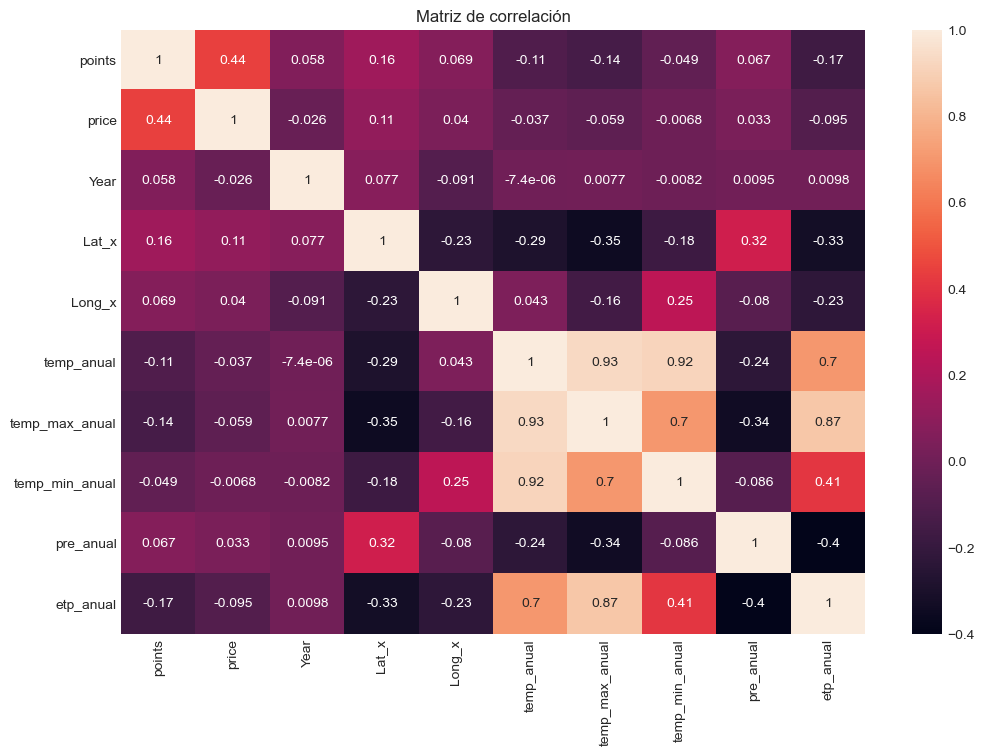

In [11]:
df_simple = df.iloc[:,1:11]
corrMatrix = df_simple.corr()
plt.figure(figsize=(12,8), dpi= 100)
sns.heatmap(corrMatrix, annot=True)
plt.title("Matriz de correlación")
plt.show()

En la matriz de correlación se analiza la correlación lineal de las variables.

**Conclusiones** Entre las vairables más interesantes en la matriz, se encuentran:

*Puntos* Cierta correlación con el precio, una baja correlación con la Latitud y una correlación baja inversa con la temperatura anual máxima y evotranspiración anual.

*Precio* Cierta corrleación con la Latitud

*Año* No se encuentra correlación alguna

*Latitud* Alguna correlación inversa con la temperatura promedio y máxima, y una correlación con la precipitación anual

*Longitud* Alguna correlación con la temperatura mínima anual y parte de correlación inversa con la precipitación anual

*temp anual promedio* Correlación con la temperatura máxima anual y mínima anual, así como con la evotranspiración, y alguna correlación inversa con la Latitud

*temp max anual* Correlación con la temperatura mínima anual y la evotranspiración. Correlación inversa con la Latitud

*temp min anual* Alguna Correlación con la evotranspiración y Longitud

*Precipitación anual* Correlaciones con las Latitudes, y correlación inversa con la temperatura máxima

*evotranspiración anual* Correlacion inversa con la Latitud, y correlaciones con la temperatura anual promedio, temperaturas máximas y mínimas

En las siguietnes gráficas, se verifican las gráficas de correlaciones entre variables, para comprender más su interrelación

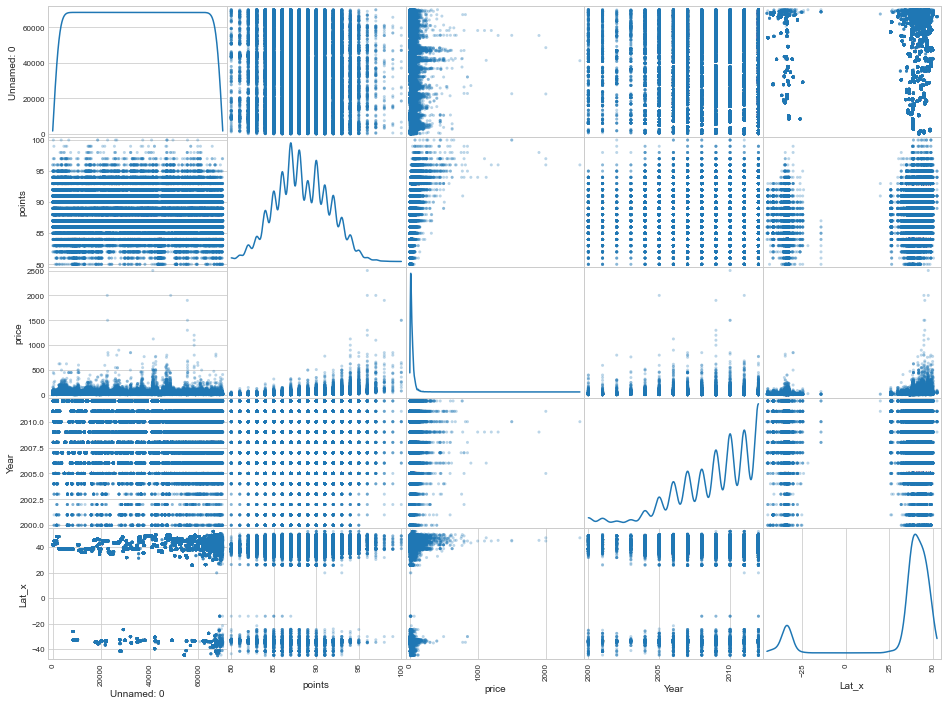

In [12]:
pd.plotting.scatter_matrix(df.iloc[:,0:5], alpha = 0.3, figsize = (16,12), diagonal = 'kde');

### Relaciones Entre Variables


En este capítulo se realiza la comparación de cada una de las variables, para encontrar si existe una correlación no lineal.

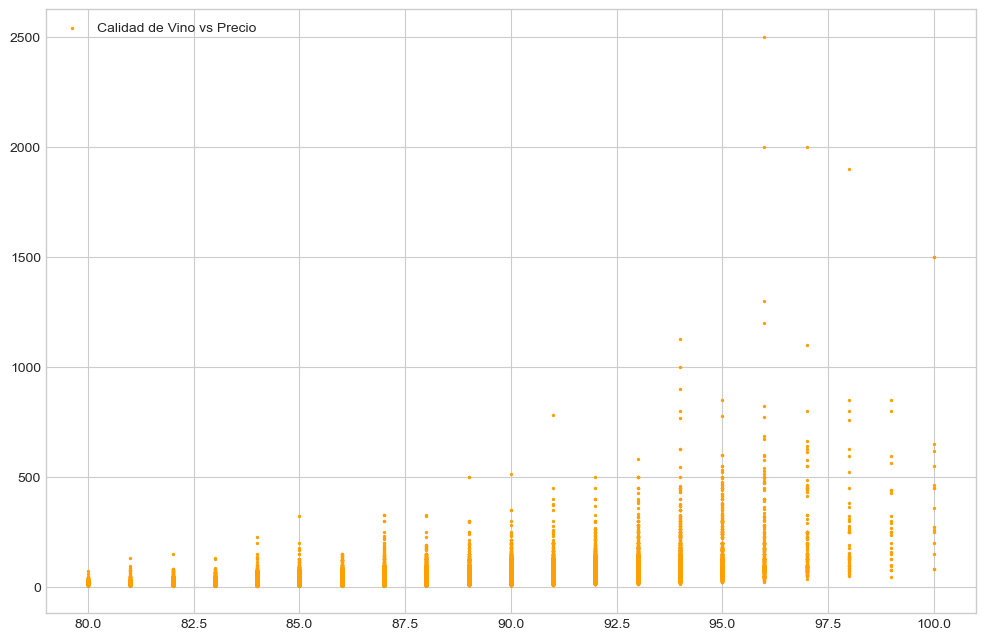

In [13]:
#Calidad vs. Precio
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['price'], s=2, label="Calidad de Vino vs Precio", color="#FFA000")
plt.legend();
plt.show()

Como se aprecia, se pueden ver una correlación lineal leve como lo mostraba la matrix de correlación. También se encuentran alguno valores atìpicos que no inciden en este análisis, pero si se encuentra que a mejor calificación, los precios de los vinos tienden a aumentar.

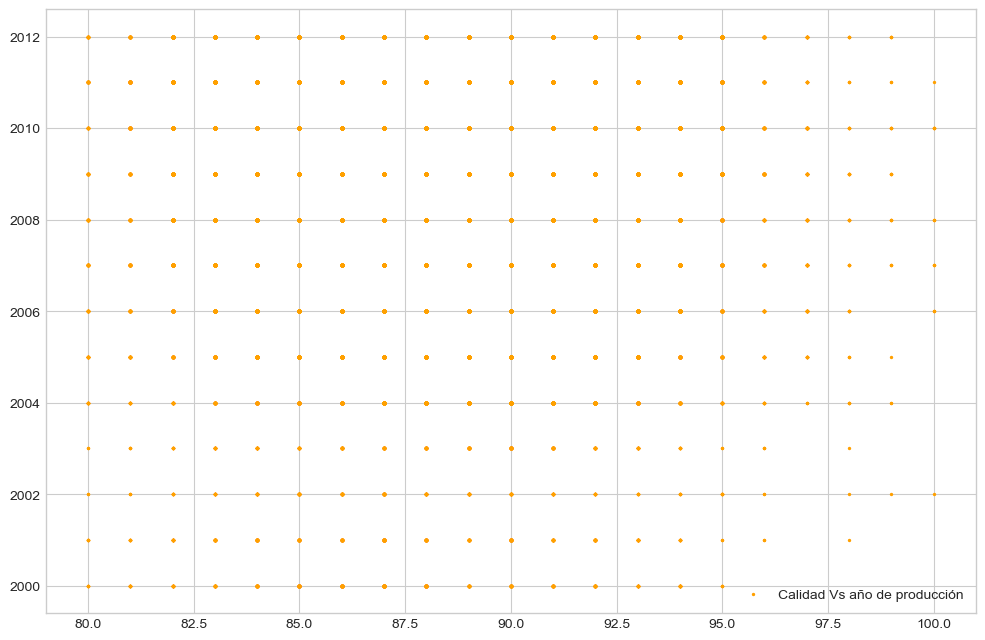

In [14]:
#Calidad vs. Año
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['Year'], s=2, label="Calidad Vs año de producción", color="#FFA000")
plt.legend();
plt.show()

En el caso de la calidad vs años, no hay una clara tendencia, se puede alcanzar a apreciar que para los años 2006 y 2008 se tienen varios casos de muy buenos vinos.

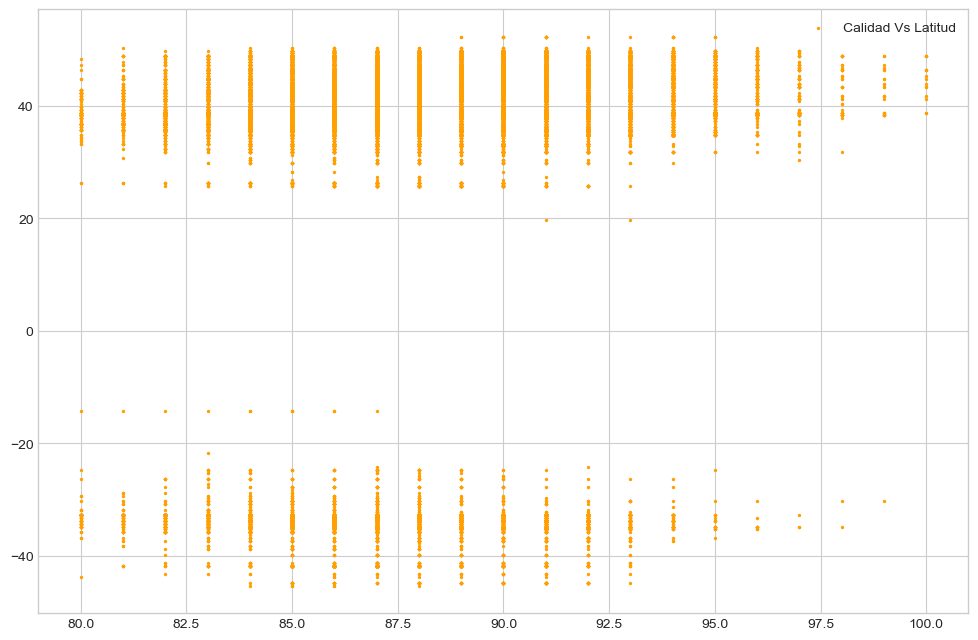

In [15]:
#Calidad vs. Latitud
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['Lat_x'], s=2, label="Calidad Vs Latitud", color="#FFA000")
plt.legend();
plt.show()

Se aprecia que los valores se agrupan en diferentes grandes subgrupos; por lo que el análisis se debe realizar en estos dos sub-grupos, parte positiva y parte negativa. Más abajo se realiza este análisis a detalle.

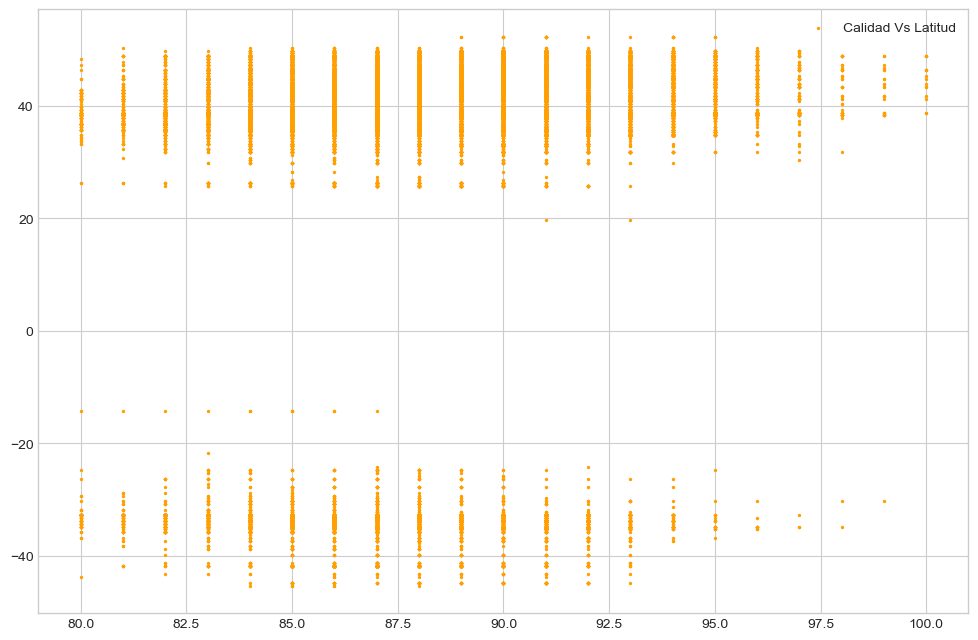

In [16]:
#Calidad vs. Latitud
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['Lat_x'], s=2, label="Calidad Vs Latitud", color="#FFA000")
plt.legend();
plt.show()

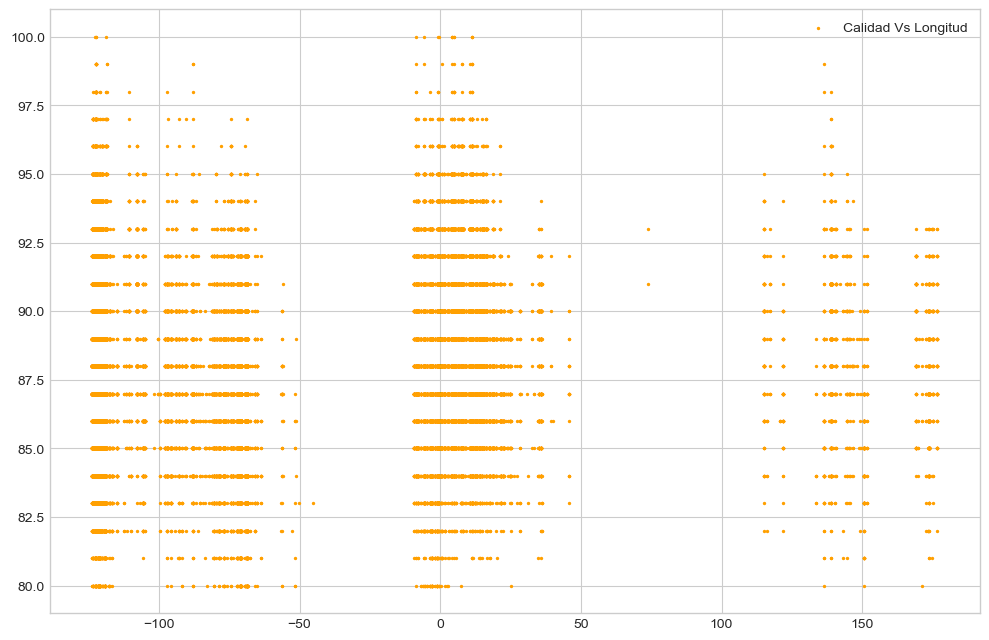

In [17]:
#Calidad vs. Longitud
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Long_x'], df['points'], s=2, label="Calidad Vs Longitud", color="#FFA000")
plt.legend();
plt.show()

Para la Calidad contra la longitud, se representa mejor la longitud en el eje X, se tiene un tema similar que el anterior, ya que se debe analizar es por zonas y no en general, aunque se encuentra cierta clusterización en las zonas. **¿Sería recomendable separar estas zonas en diferentres nuevas columnas y realizar nuevamente un análisis de correlación lineal?**

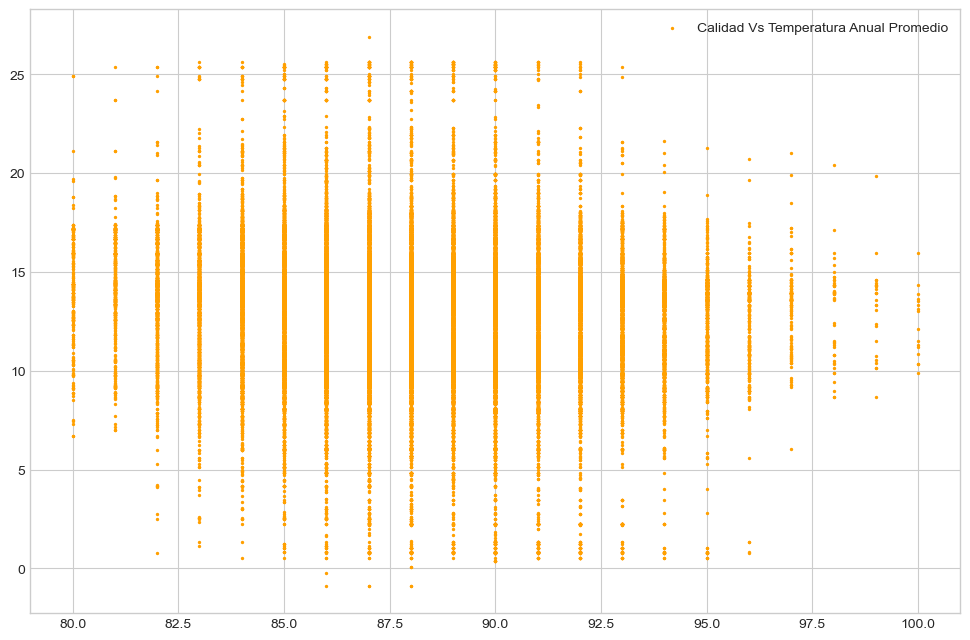

In [18]:
#Calidad vs. Temperatura anual Promedio
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['temp_anual'], s=2, label="Calidad Vs Temperatura Anual Promedio", color="#FFA000")
plt.legend();
plt.show()

En este caso, se ve una leve relación de la calidad con la temperatura. Este análisis se puede ver mejor en un histograma, para así poder ver en donde existe mayor densidad y así intentar determinar la mejor temperatura promedio, sobre todo en puntajes muy altos. Si nos centramos en la calidad de 98 a 100, las temperaturas ideales parecen estar entre los 9 y 16 grados de promedio.

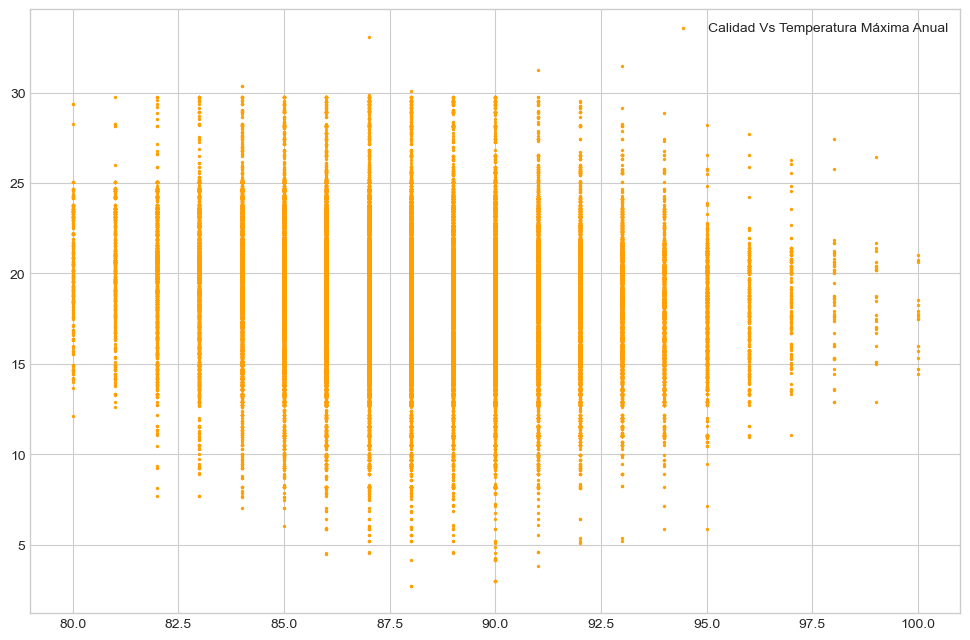

In [19]:
#Calidad vs. Temperatura Máxima Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['temp_max_anual'], s=2, label="Calidad Vs Temperatura Máxima Anual", color="#FFA000")
plt.legend();
plt.show()

Similar como se aprecia en la temperatura promedio, se encuentra una leve correlación, principalmente en los vinos de alta calidad, donde los valores de temperatura máxima ideal se encuentran alrededor de los 14 y 22 grados centigrados en promedio

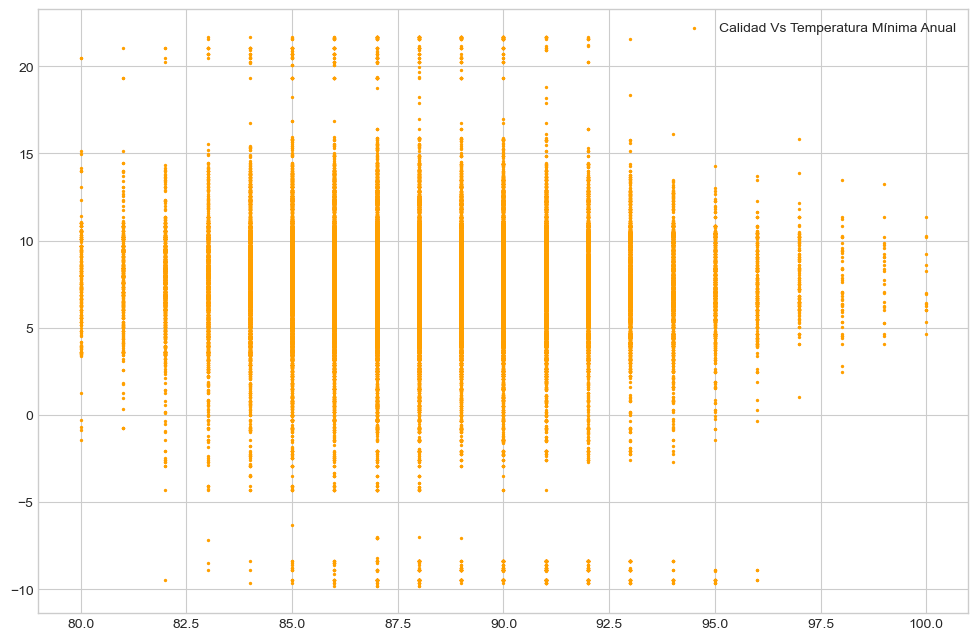

In [20]:
#Calidad vs. Temperatura Mínima Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['temp_min_anual'], s=2, label="Calidad Vs Temperatura Mínima Anual", color="#FFA000")
plt.legend();
plt.show()

Nuevamente se encuentra cierta correlación con la temperatura mínima anual. En este caso, los valores ideales se encuentran entre los 5 y 11 grados centigrados. Es imporante remarcar que es posible sembrar vinos con diversas temperaturas extremas, el objetivo de este análisis es encontrar las variables que más favorecen a tener un vino de excelente calidad.

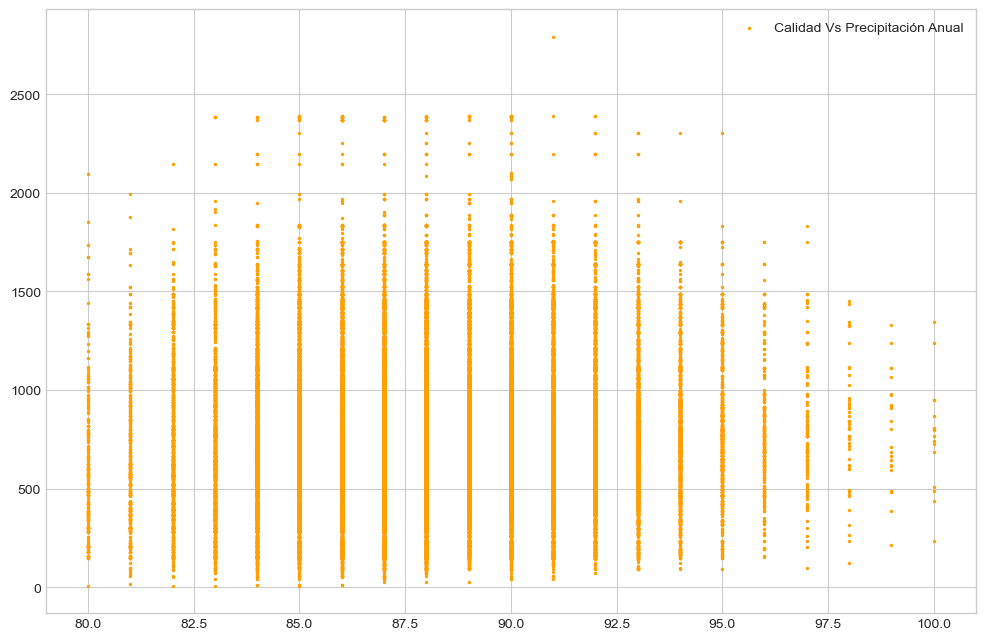

In [21]:
#Calidad vs. Precipitación Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['pre_anual'], s=2, label="Calidad Vs Precipitación Anual", color="#FFA000")
plt.legend();
plt.show()

En el caso de la precipitación anual, se encuentra también un sesgo importante, teniendo valores entre 250mm y 1400mm de precipitación anual. Esto permite inferir que un es importante una precipitación, sin embargo lugares con muy poca precipitación (desérticos) o con mucha lluvia no son aptos para tener buenas cepas de calidad de vino

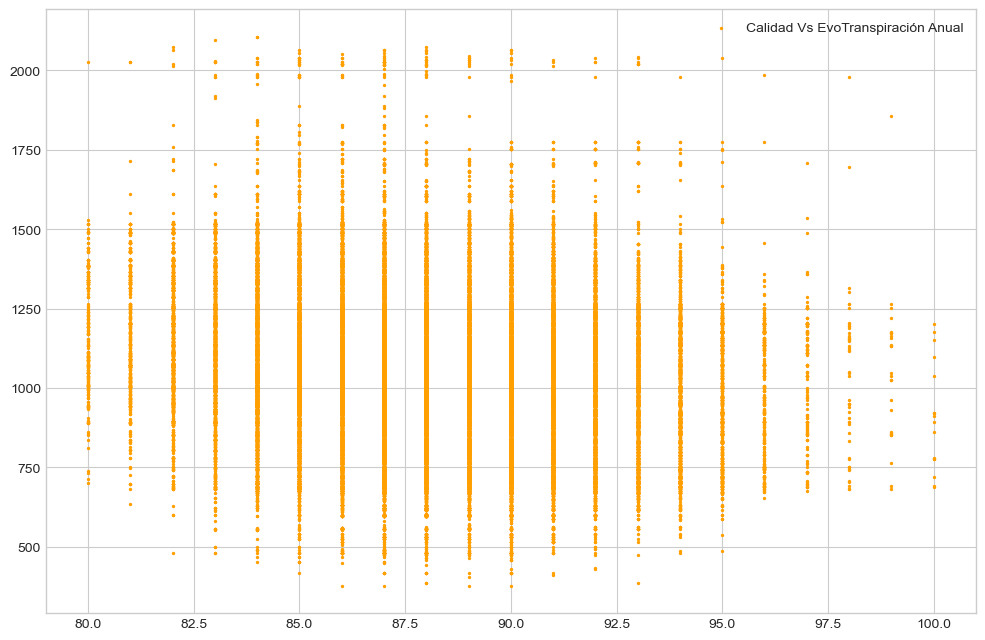

In [22]:
#Calidad vs. EvoTranspiración Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['etp_anual'], s=2, label="Calidad Vs EvoTranspiración Anual", color="#FFA000")
plt.legend();
plt.show()

Se encuentra un sesgo interesante en la EvoTranspiración Anual. Es importante recordarel concepto de evotranspiración:
"La evaoración es el fenómeno físico en el que el agua pasa de líquidi a vapor, producido desde:
* La superficie del suelo y vegetación de forma inmediata luego de la precipitación
* Desde la superficie del agua (en este caso no aplica)
* Desde el suelo, agua filtrada que se evapora desde la parte superficial del suelo
La transpiración es el fenómeno biológico por el que las plantas pierden agua a la atmósfera. Toman parte del agua con sus raíces, el cual una parte se usa para su crecimiento y el resto la transpiran.

Como ambas mediciones son dificiles de realizar por separado, y en la mayoría de los casos lo más importante es la cantidad total de agua que se pierde a la atmosfera, se considera conjuntamente bajo el concepto de EvoTranspiración. Basicamente se resume en centrar la cuantificación de recursos hidrológicos de un área; lo que llueve menos lo que se *evotranspira* es el volumen de agua disponible"

Con este valor, lo que obtenemos es la cantidad de agua que se requiere para un correcto cultivo y desarrollo de los viñedos; es aun más interesante encontrar que los valores de evotranspiración para los vinos de alta calidad oscilan entre los 650mm y 1300mm. También se encuentran algunos valores "atípicos" alrededos de los 1400mm a 1900mm, para esto se propone enfocar un nuevo análisis solo en estos valores vs la cepa del vino, para así entender si esto se puede dar dependiendo del tipo de uva.

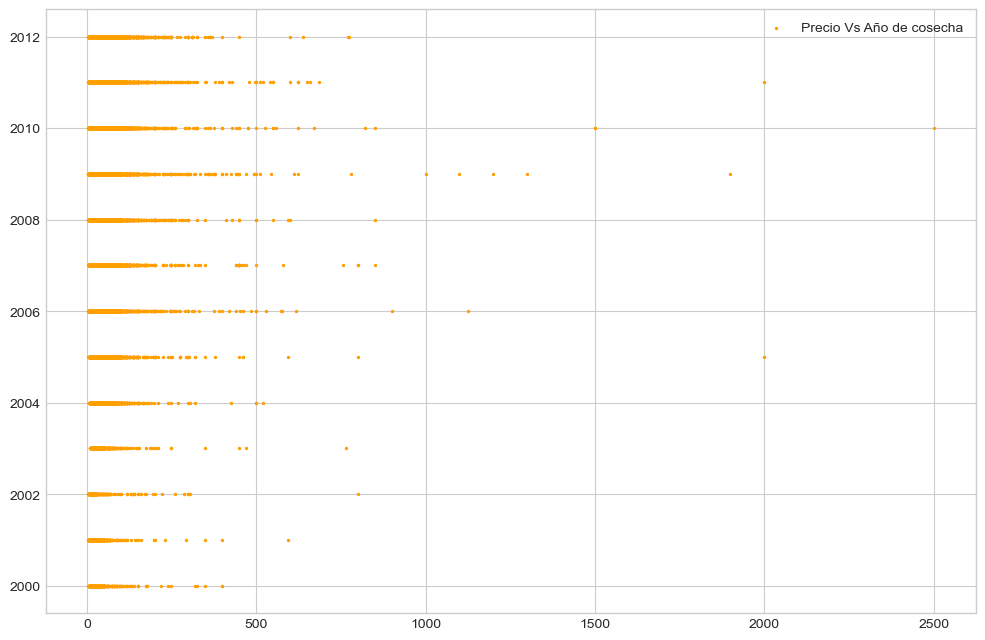

In [24]:
#Precio vs. Año de Cosecha
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['price'], df['Year'], s=2, label="Precio Vs Año de cosecha", color="#FFA000")
plt.legend();
plt.show()

Relacionando el precio contra el año de siembra, no se encuentra una correlación clara de los precios del vino. Si se encuentran algunos valores atípicos en el año 2009, lo cual puede ser resultado de la crisis mundial de 2008, y donde posiblemente se realizó una menor producción de vino, a menos producción, mayor precio; sin embargo también puede ser dado por un sesgo en la información original ya que winereviews se basa en calificar vinos en general y no en vinos de alto precio.

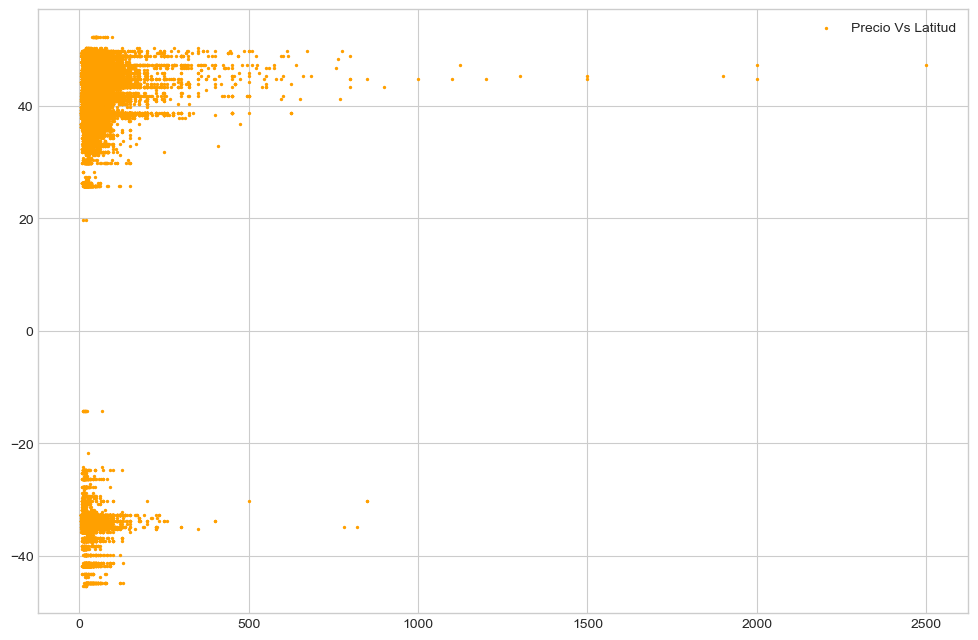

In [26]:
#Precio vs. Latitud
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['price'], df['Lat_x'], s=2, label="Precio Vs Latitud", color="#FFA000")
plt.legend();
plt.show()

Es interesante encontrar que los precios atípicos se encuentran alrededor de la Latitud 45°, ya que justo pertenece a la zona de California (Napa Valley) y la misma concuerda con las regiones de España, Italia y Francia. Se podría tamnien analizar la zona de -30°, donde se encuentran varios vinos de mejor precio. Se puede analizar, en esta zona, si se pudieran encontrar aun más zonas con las temepraturas ideales

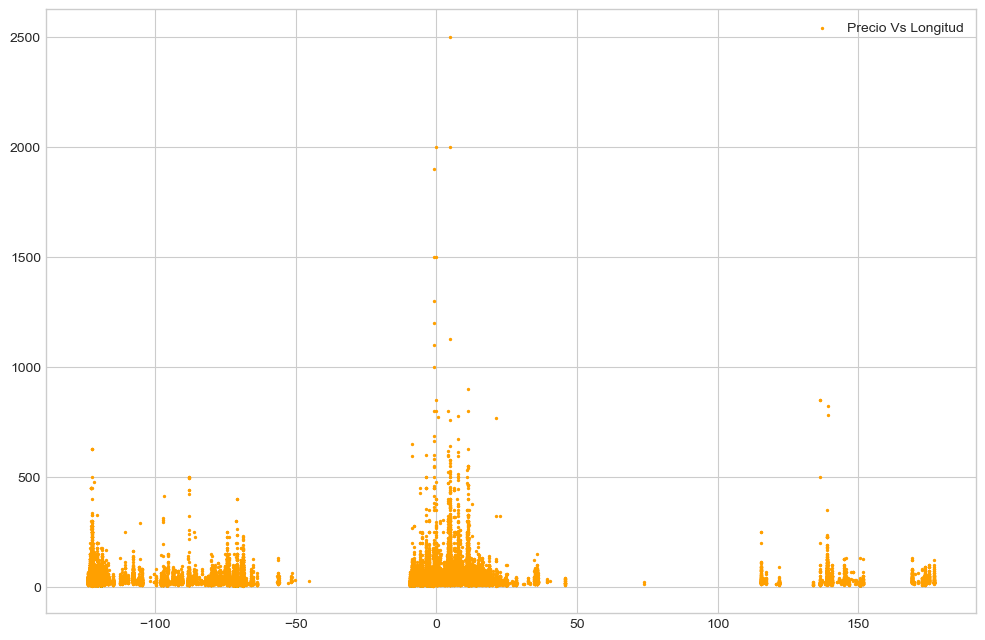

In [25]:
#Precio vs. Longitud
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Long_x'], df['price'], s=2, label="Precio Vs Longitud", color="#FFA000")
plt.legend();
plt.show()

En este caso vemos que los precios atípicos se centran alrededor de los 0°; lo cual quiere decir que estos vinos tienden a ser los de la zona cercana a España, Francia e Italia. Algunos otros valores elevados son los de la zona de Australia. Es interesante que la zona de la Costa Oeste de Estados Unidos tienen vinos que oscilan alrededor de los 250 dólares, precios bastante acsequibles.

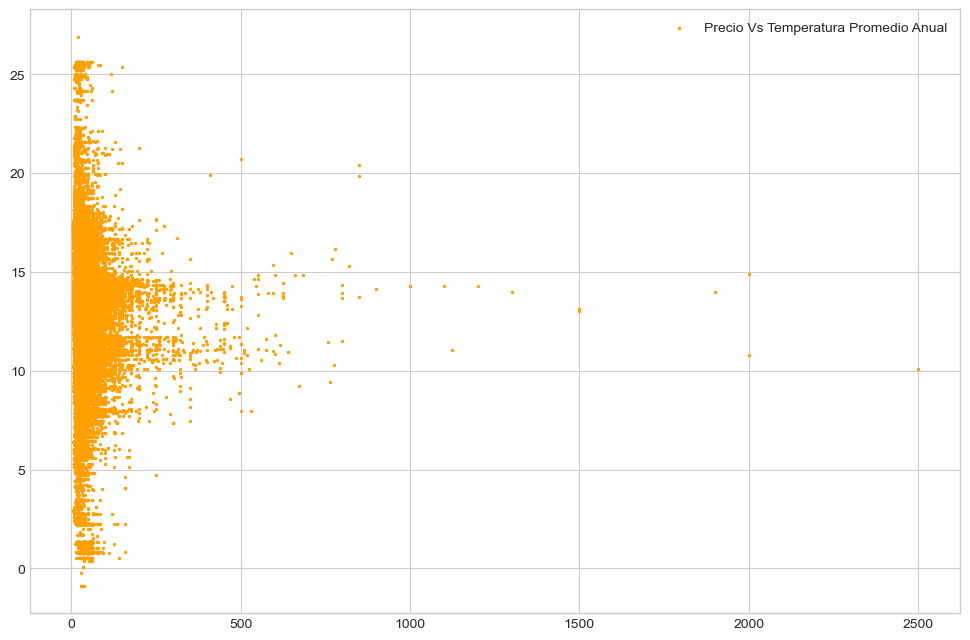

In [26]:
#Precio vs. Temperatura Promedio Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['price'], df['temp_anual'], s=2, label="Precio Vs Temperatura Promedio Anual", color="#FFA000")
plt.legend();
plt.show()

En este caso, los vinos más caros oscilan en las temperaturas promedio anuales de 10 a 15°. Esto también permite identificar que una buena zona para sembrar vinos, que pueden ser altamente rentables son en la misma zona de vinos de buena calidad.

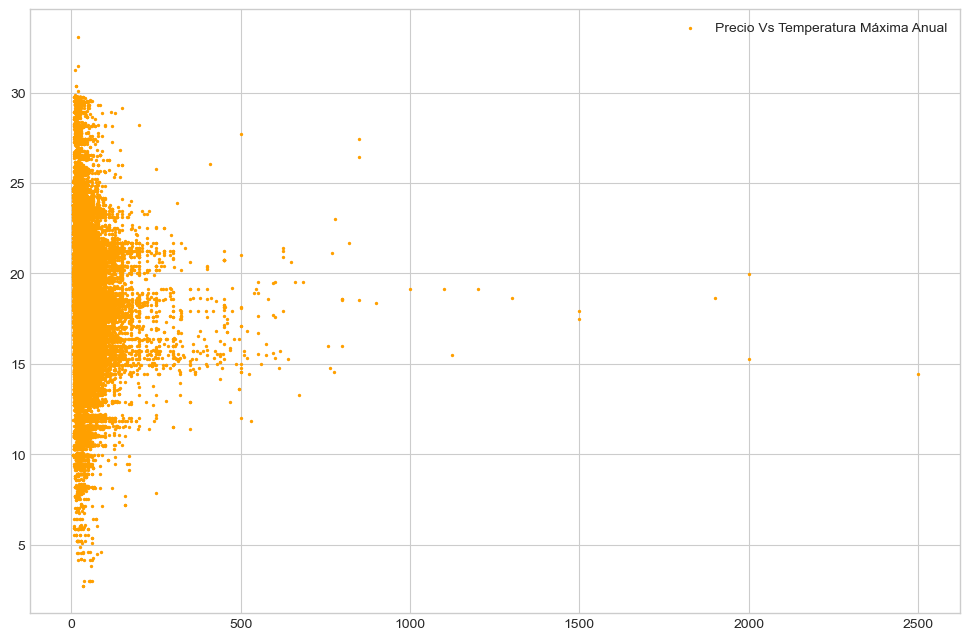

In [27]:
#Precio vs. Temperatura Máxima Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['price'], df['temp_max_anual'], s=2, label="Precio Vs Temperatura Máxima Anual", color="#FFA000")
plt.legend();
plt.show()

Nuevamente, los vinos con mayor precio se ubican dentro del rango de los 14 y 22 grados, validando la hipótesis de que la temperatura máxima anual varía entre este rango.

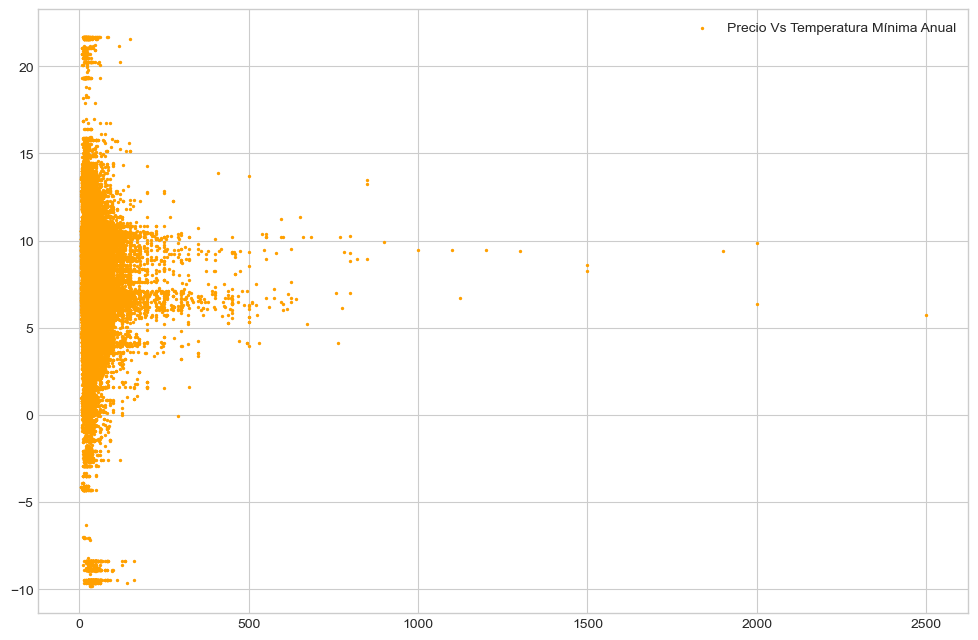

In [28]:
#Precio vs. Temperatura Mínima Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['price'], df['temp_min_anual'], s=2, label="Precio Vs Temperatura Mínima Anual", color="#FFA000")
plt.legend();
plt.show()

Así como con los otros datos de temperatura, los vinos de mayor precio varían su temperatura mínima entre los 4 y 13 grados centigrados. Esto permite seguir validando las interpretaciones anteriores, ya que un vino de alto precio no seria comercialmente rentable si no es vendido de manera racional por el público.

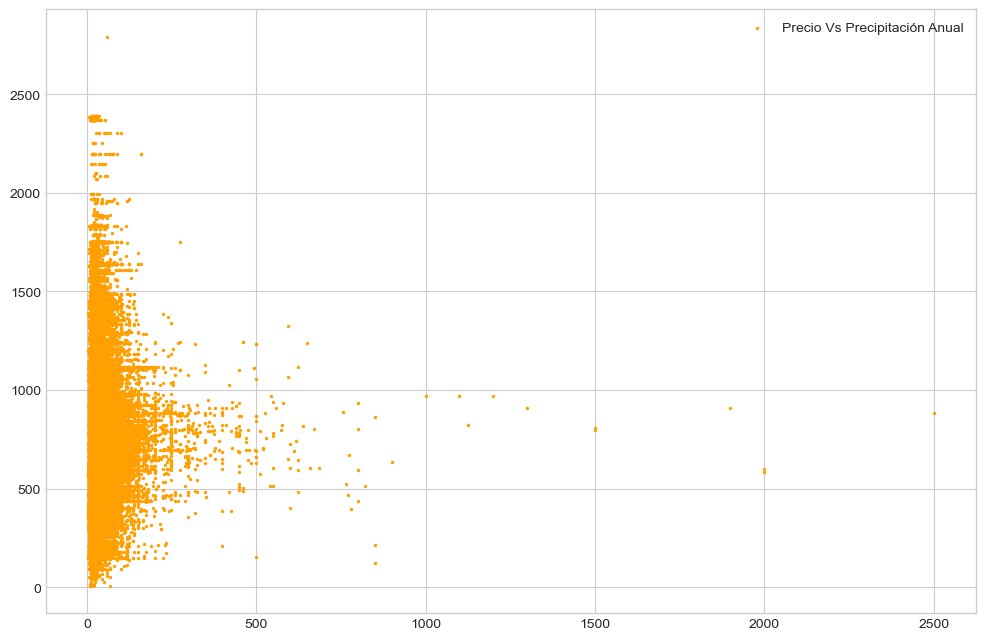

In [29]:
#Precio vs. Precipitación Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['price'], df['pre_anual'], s=2, label="Precio Vs Precipitación Anual", color="#FFA000")
plt.legend();
plt.show()

Para la precipitación anual encontramos que los vinos con mayor precio se ubican, con respecto a la precipitación, con valores entre los 200mm y los 1400mm al igual que el análisis de calidad

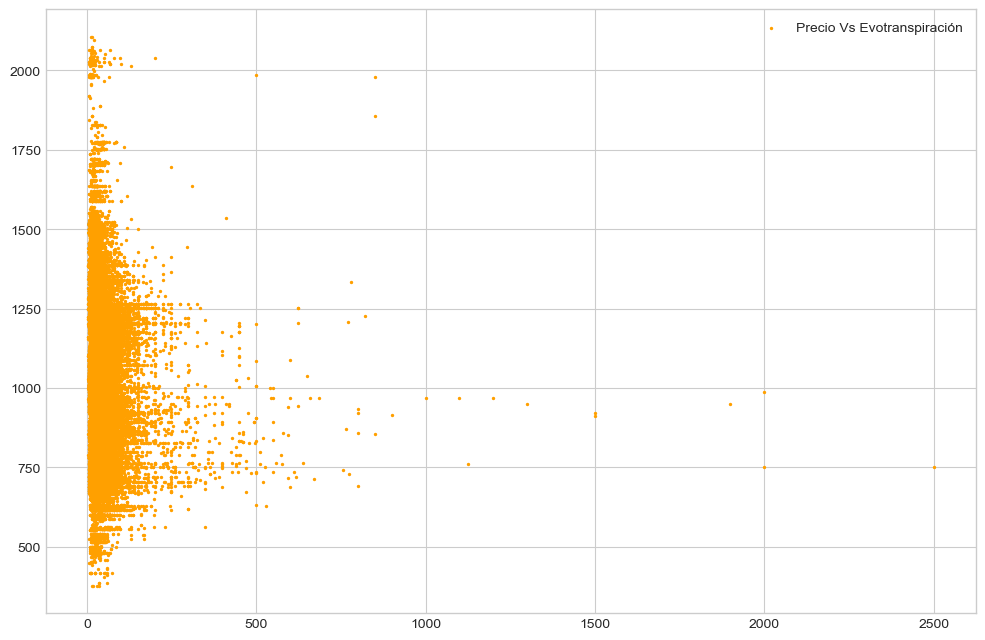

In [31]:
#Precio vs. Evotranspiración
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['price'], df['etp_anual'], s=2, label="Precio Vs Evotranspiración", color="#FFA000")
plt.legend();
plt.show()

En este caso encontramos que los valores para los vinos de mayor precio se encuentran entre los 600mm y los 1300mm. También se encuentran algunos valores atípicos alrededor de los 180mm a los 1900mm, por lo cual resulta interesante analizar estos vinos para encontrar si correspoden a una cepa en partícular que requiera mayor evotranspiración (agua requerida para la siembra)

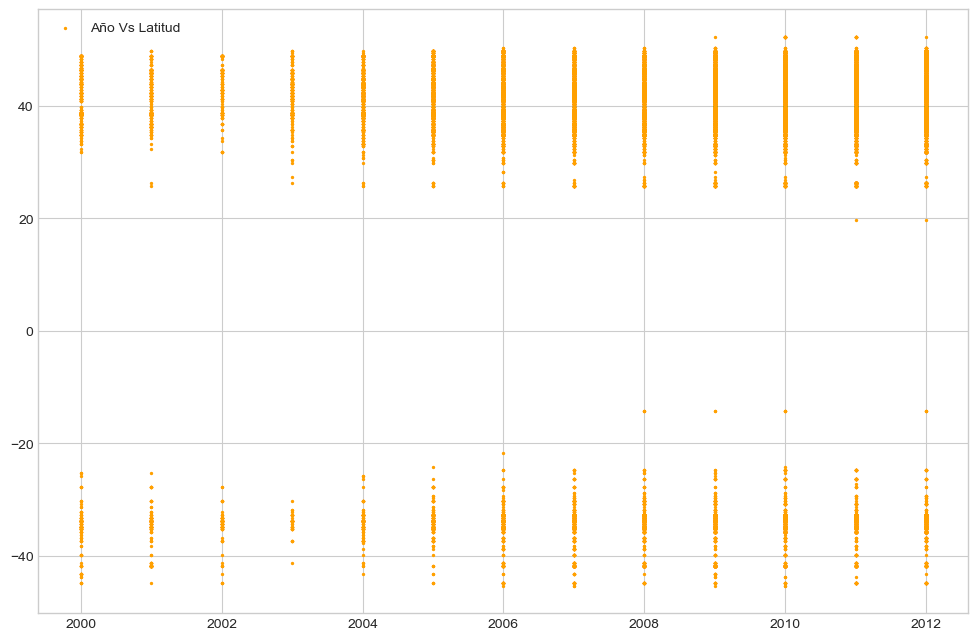

In [33]:
#Año vs. Latitud
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Year'], df['Lat_x'], s=2, label="Año Vs Latitud", color="#FFA000")
plt.legend();
plt.show()

Este análisis nos permite ver la relación de las muestras por año, vs la Latitud de la cosecha. En este caso encontramos que hay una concentración de muestras mucho mayor para la latitud positiva, así podemos determinar que nuestro dataframe se encuentra un poco desbalanceado en esta variable. También se encuentra cierto desbalanceo para las variables de los años 2000 a 2006, posiblemente por que hay mayor producción de vino en los ultimos años (el vino es uno de los productos con un crecimiento YoY alto; anexar referencias de este análisis)

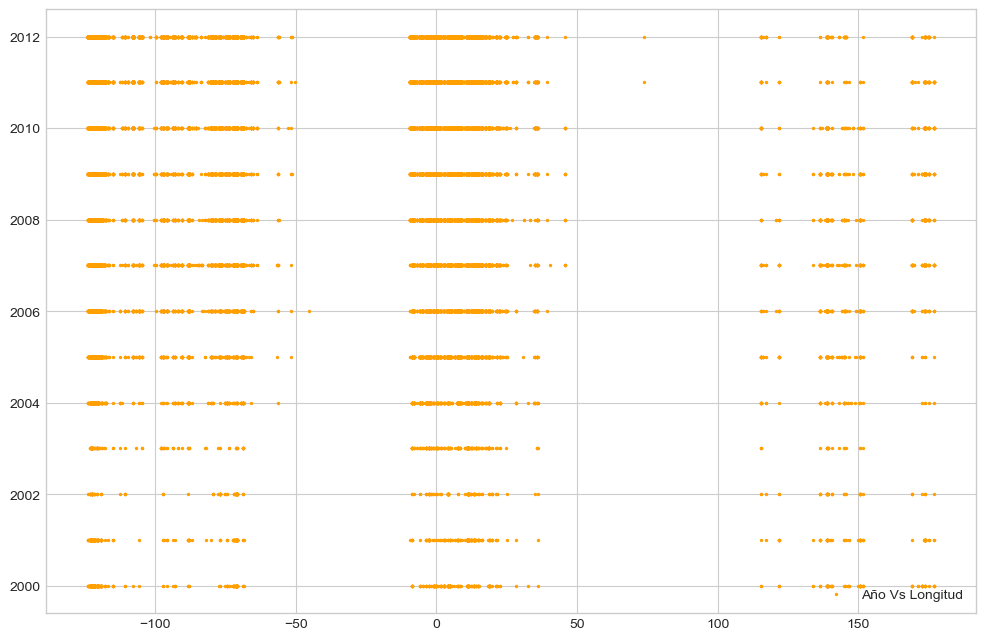

In [34]:
#Año vs. Longitud
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Long_x'], df['Year'], s=2, label="Año Vs Longitud", color="#FFA000")
plt.legend();
plt.show()

Para la Longitud encontramos la misma conclusión que para la Latitud, así mismo, tambien vemos un dataframe desbalanceado, teniendo gran cantidad de vinos de la parte Oeste de Europa, y menos cantidad de datos para la parte Americana y Asiática-Oceánica

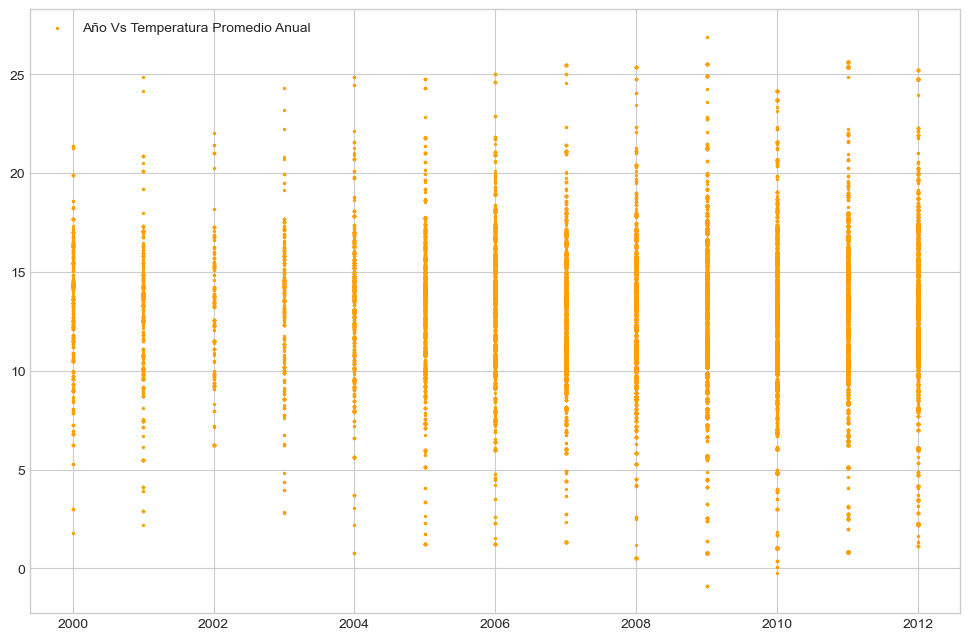

In [35]:
#Año vs. Temperatura Promedio Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Year'], df['temp_anual'], s=2, label="Año Vs Temperatura Promedio Anual", color="#FFA000")
plt.legend();
plt.show()

Se puede apreciar que a medida que aumentan los años, se ve un crecimiento de los valores extremos de las tempreaturas promedio, esto puede deberse principalmente al calentamiento global o también al desbalanceo del dataframe y el cambio climático, y el cambio en las zonas donde se tienen máyores entradas de datos

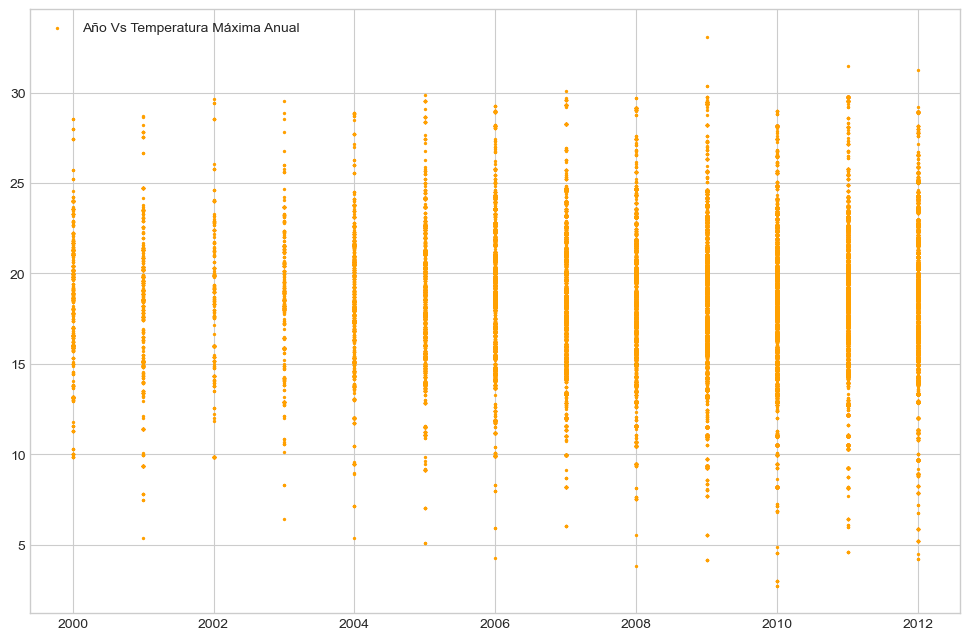

In [37]:
#Año vs. Temperatura Máxima Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Year'], df['temp_max_anual'], s=2, label="Año Vs Temperatura Máxima Anual", color="#FFA000")
plt.legend();
plt.show()

Nuevamente se aprecia un incremento del rango de temperatura máxima anual en los últimos años.

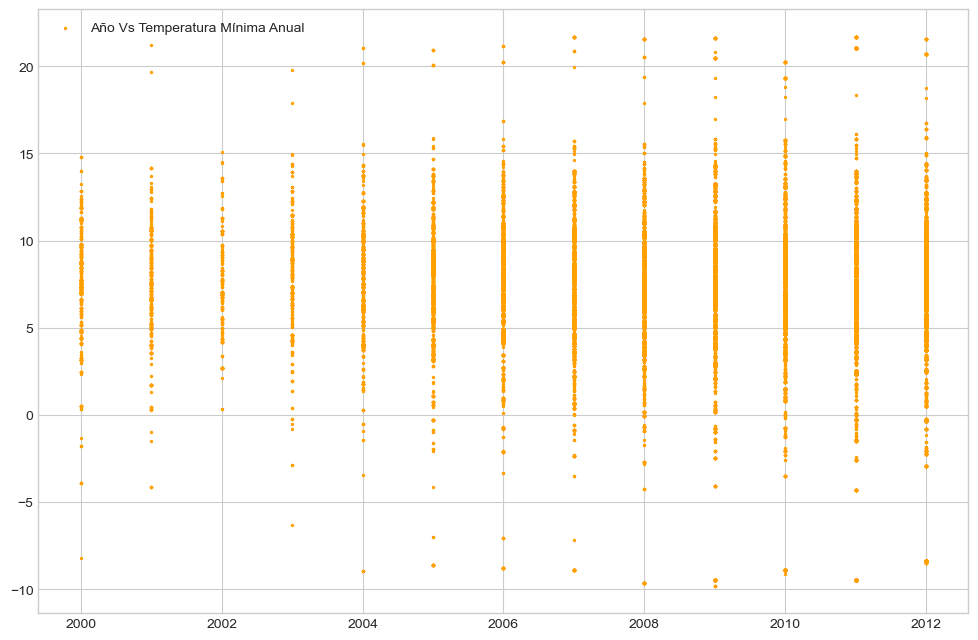

In [38]:
#Año vs. Temperatura Mínima Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Year'], df['temp_min_anual'], s=2, label="Año Vs Temperatura Mínima Anual", color="#FFA000")
plt.legend();
plt.show()

Encontramos nuevamente la misma conclusión para las temperaturas mínimas anuales.

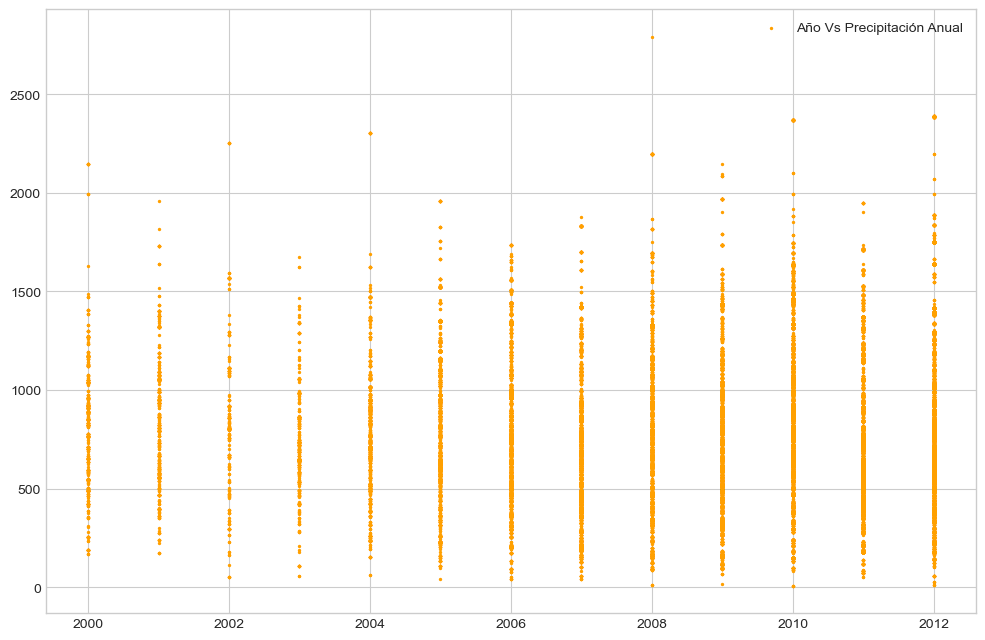

In [39]:
#Año vs. Precipitación Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Year'], df['pre_anual'], s=2, label="Año Vs Precipitación Anual", color="#FFA000")
plt.legend();
plt.show()

Con respecto a la precipitación, se puede tambien ver casos de mayor precipitación hacia los años recientes, pero en terminos generales el rango principal se mantiene en los años

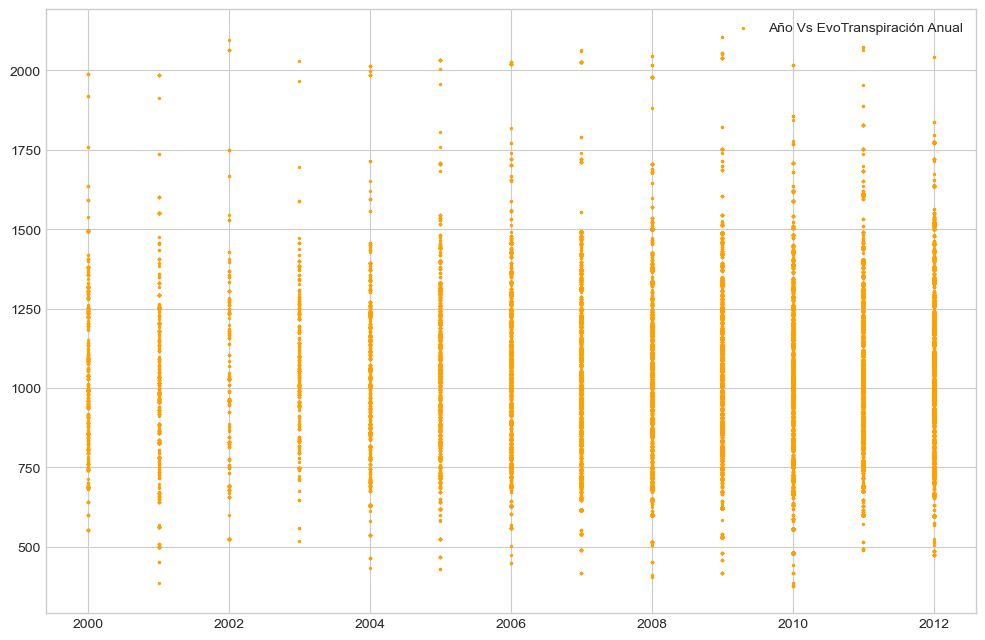

In [40]:
#Año vs. EvoTranspiración Anual
plt.figure(figsize=(12,8), dpi= 100) 
plt.scatter(df['Year'], df['etp_anual'], s=2, label="Año Vs EvoTranspiración Anual", color="#FFA000")
plt.legend();
plt.show()

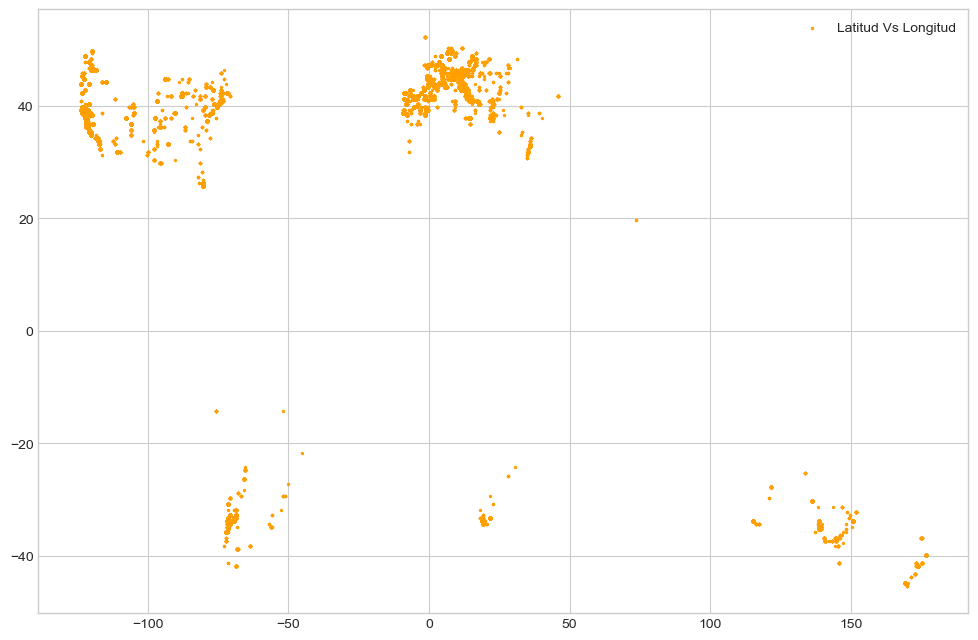

In [42]:
#Latitud vs. Longitud (Invertido para poder ver el mapa mundial y los vinos de la muestra)
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Long_x'], df['Lat_x'], s=2, label="Latitud Vs Longitud", color="#FFA000")
plt.legend();
plt.show()

En este caso se aprecia el muestre en un mapa imaginario, donde vemos las muestras de Estados Unidos y Canadá, luego en la parte inferior cosechas en chile y argentina, con alguos valores en perú, Brazil y cosechas en la costa este de Argentina. Luego se puede ver claramente Europa con la mayor clusterización de muestras, parte del muestreo en la parte sur de África, y por último valores en la India, China y Australia

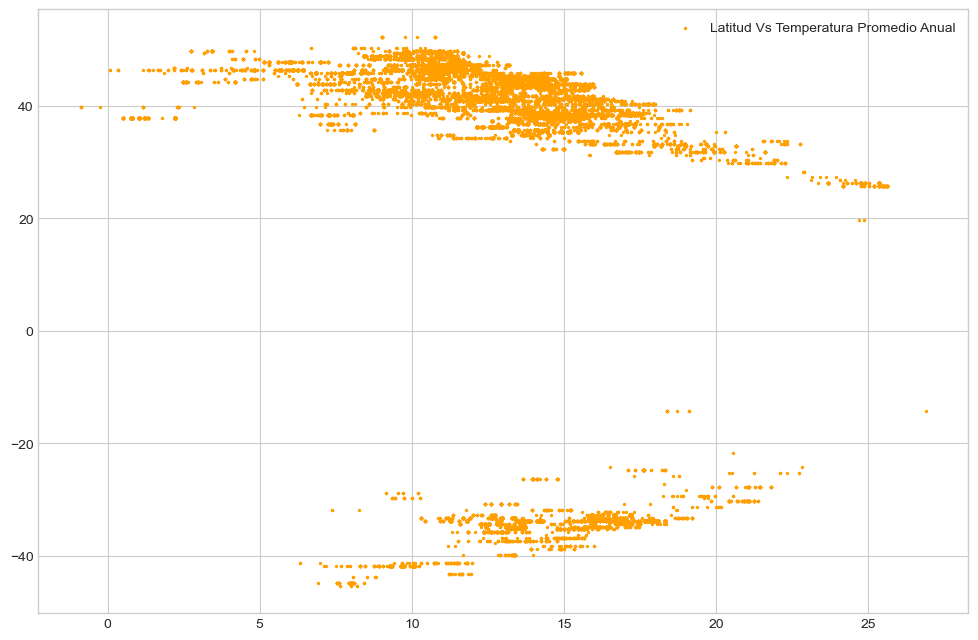

In [45]:
#Latitud vs. Temperatura Promedio Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['temp_anual'], df['Lat_x'], s=2, label="Latitud Vs Temperatura Promedio Anual", color="#FFA000")
plt.legend();
plt.show()

En este caso encontramos que los valores de tempreatura promedio extremos se encuentran en la parte positiva de la Latitud, posiblemente por la cantidad de muestreos; pero est también permite inferir que entre más cerca del Ecuador, las temperaturas promedio anuales comienzan a aumentar. También encontramos que en la misma Latitud se pueden encontrar amplios rangos de temperaturas, que indica como conclusión que no solo seleccionar una Latitud con buena calidad es suficiente, pero también hay que evaluar los valores de temperatura. Otro punto interesante es que es posible buscar algunas zonas al Sur del tròpico de Capricornio que tengan los rangos de temperatura ideales para el proyecto de cultivo.

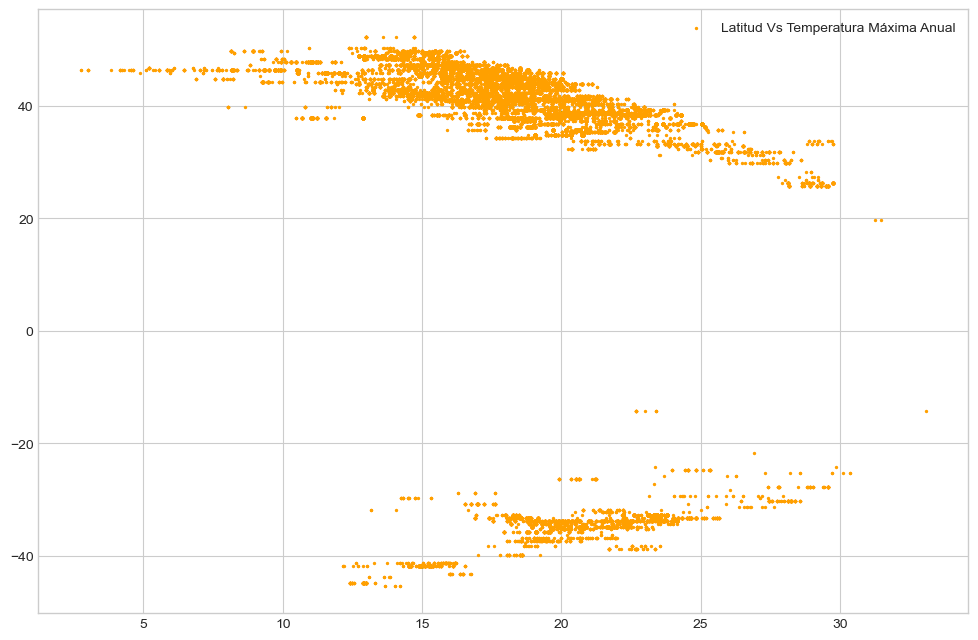

In [46]:
#Latitud vs. Temperatura Máxima Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['temp_max_anual'], df['Lat_x'], s=2, label="Latitud Vs Temperatura Máxima Anual", color="#FFA000")
plt.legend();
plt.show()

Se obteiene una conclusión similar a la anterior, con variaciones de temperatura cercana al Ecuador, y con algumas zonas en el sur que podrían evaluarse con respecto a las mejores temperaturas.

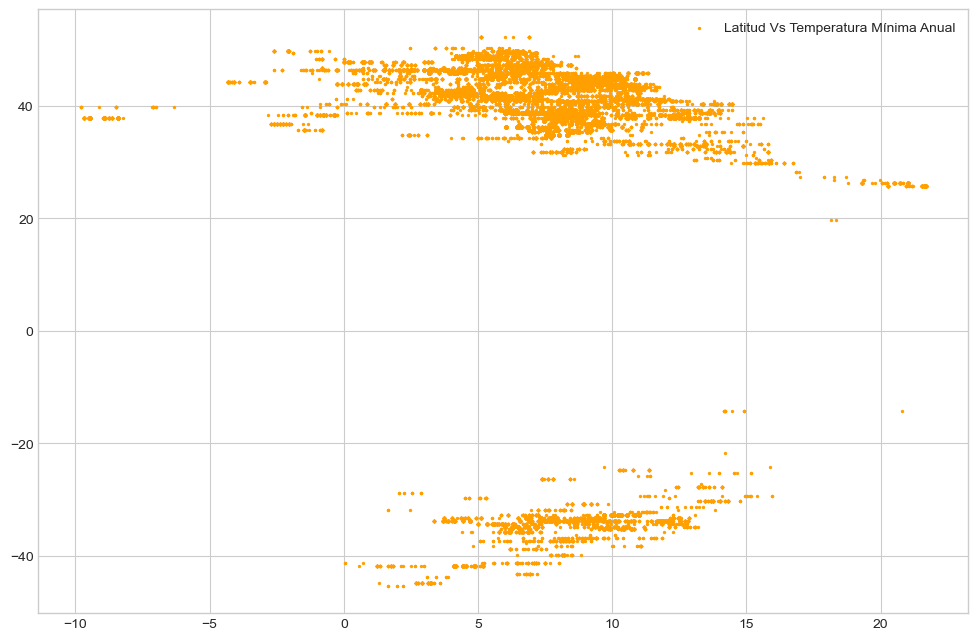

In [48]:
#Latitud vs. Temperatura Mínima Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['temp_min_anual'], df['Lat_x'], s=2, label="Latitud Vs Temperatura Mínima Anual", color="#FFA000")
plt.legend();
plt.show()

Para este caso, encontramos nuevamente la misma conclusión anterior.

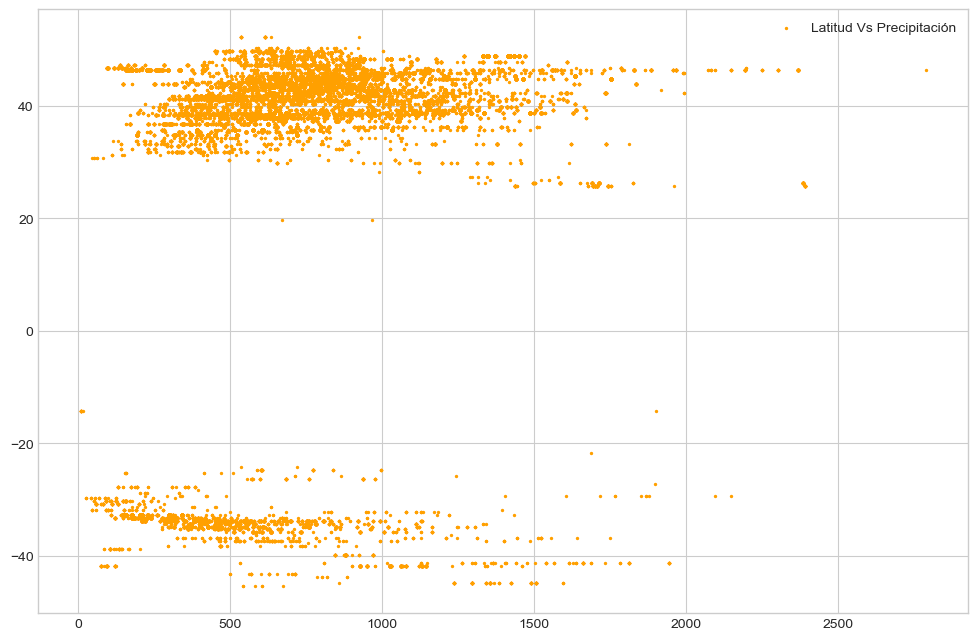

In [49]:
#Latitud vs. Precipitación Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['pre_anual'], df['Lat_x'], s=2, label="Latitud Vs Precipitación", color="#FFA000")
plt.legend();
plt.show()

Para la precipitación, encontramos el desbalance del dataframe, teniendo muchos más datos para la parte positiva de la Latitud. Los ranfos de mejor precipitación se mantienen en ciertos sitios pero se pueden analizar nuevas zonas en la parte sur para nuevos cultivos.

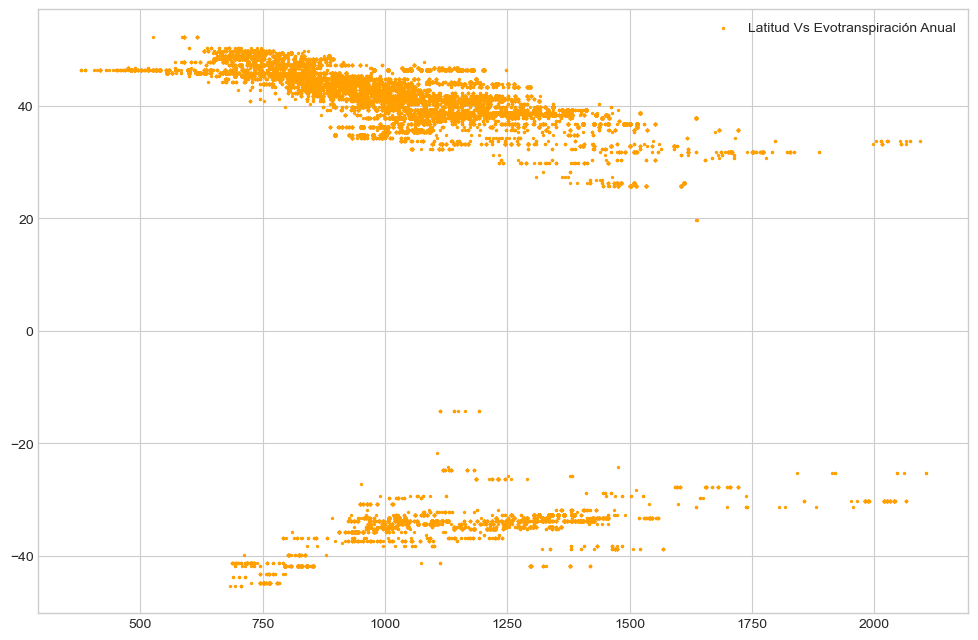

In [50]:
#Latitud vs. Evotranspiración Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['etp_anual'], df['Lat_x'], s=2, label="Latitud Vs Evotranspiración Anual", color="#FFA000")
plt.legend();
plt.show()

Nuevamente, con respecto a la Evotranspiración, se encuentran los mismos resultados; sin embargo, a medida que se acerca a la zona del Ecuador se ve una tendencia que los viñedos requieren más agua para poder producirse.

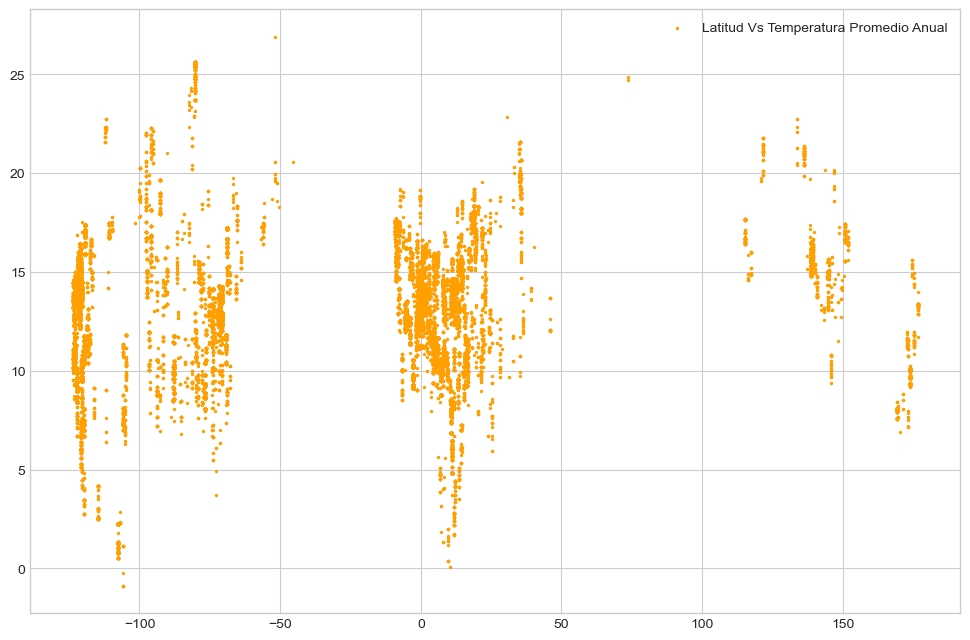

In [51]:
#Longitud vs. Temperatura Promedio Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Long_x'], df['temp_anual'], s=2, label="Latitud Vs Temperatura Promedio Anual", color="#FFA000")
plt.legend();
plt.show()

AMERICA
Se encuentra cierta tendencia, que a medida que se mueve hacia la costa este, los valores de temperatura promedio comienzan a aumentar. Esto permite encontra mejores zonas en esta parte para las cosechas de vino.

EUROPA/AFRICA
En este caso, aunque son zonas diferentes, podemos ver que la mayoría ed vinos se sentra entre los 9 y 16 grados, temperatura óptima para la cosecha de vinos.

ASIA/OCEANÍA
Acá se encuentran valores con temperaturas muy buenas para la siembra, con algunos casos de temperaturas un poco más altas. En este caso, se pueden tambien buscar zonas para nuevos cultivos de vino

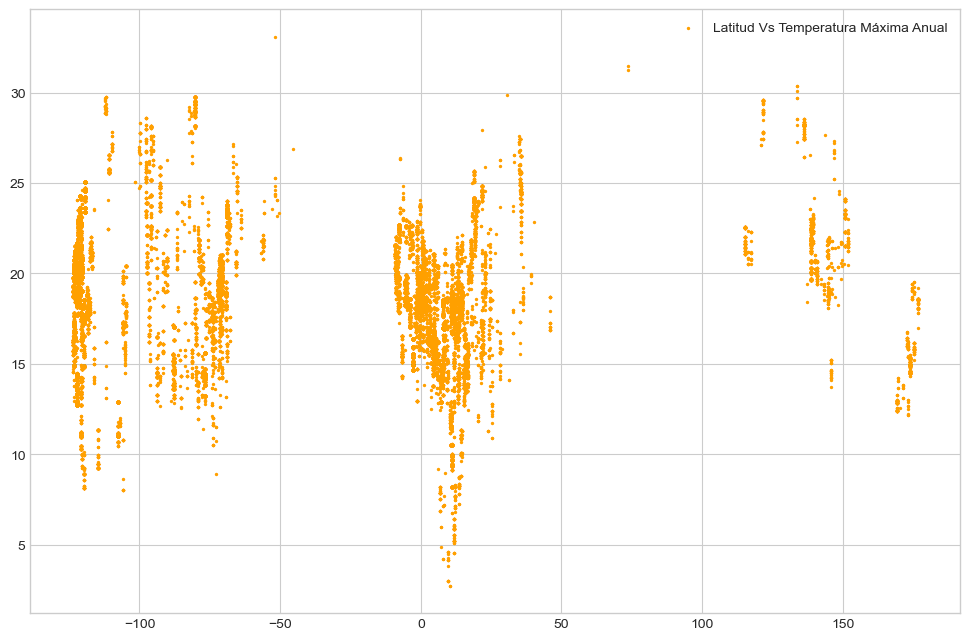

In [52]:
#Longitud vs. Temperatura Máxima Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Long_x'], df['temp_max_anual'], s=2, label="Latitud Vs Temperatura Máxima Anual", color="#FFA000")
plt.legend();
plt.show()

En esta comparativa vemos nuevamente algo similar a la comparativa anterior, sin embargo se ve en ASIA y OCEANIA que existe una mayor temperatura máxima, por lo cual las zonas a proponer para cultivos no deben tener temperaturas tan extremas. Acá una opción es buscar lugares cercanos al oceano para que las corrientes de viento refresquen dichos cultivos.

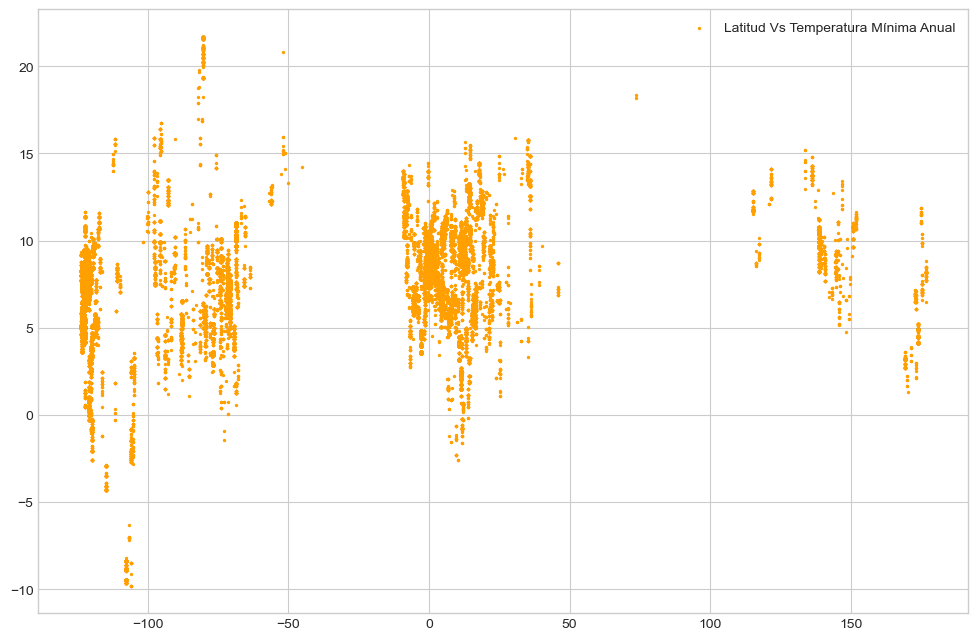

In [53]:
#Longitud vs. Temperatura Mínima  Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Long_x'], df['temp_min_anual'], s=2, label="Latitud Vs Temperatura Mínima Anual", color="#FFA000")
plt.legend();
plt.show()

Inversamente, con la comparativa anterior, la zona Americana tiene temperaturas mínimas más bajas, por lo que las zonas del sur que se recomienden no pueden bajar tanto de temperatura para estar sobre el rango ideal. En este caso, Asia y Oceanía presenta para temperaturas mínimas ideales

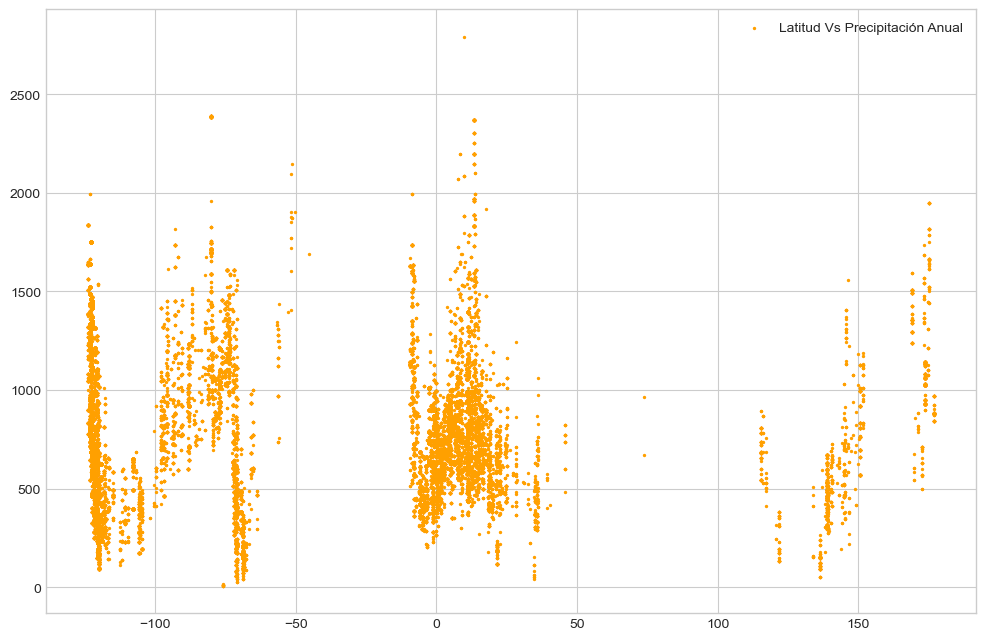

In [54]:
#Longitud vs. Precipitación
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Long_x'], df['pre_anual'], s=2, label="Latitud Vs Precipitación Anual", color="#FFA000")
plt.legend();
plt.show()

En el caso de la precipitación, la mayoría de regiones se encuentran en zonas con precipitación recomendable para el cultivo. Es interesante ver que en la costa Oeste de Estados unidos tiene un rango ideal, pero a medida que se avanza hacia el este los valores de precipitación son menores, debido a que la zona Oeste esta pegada al oceano atlantico y sus correintes de aire. Caso contrario sucede entre chile y argentina donde se puede apreciar que hay un decenso en la precipitación anual, y donde vuelve a aumentar a medida que se acerca al Oceano Pacífico.

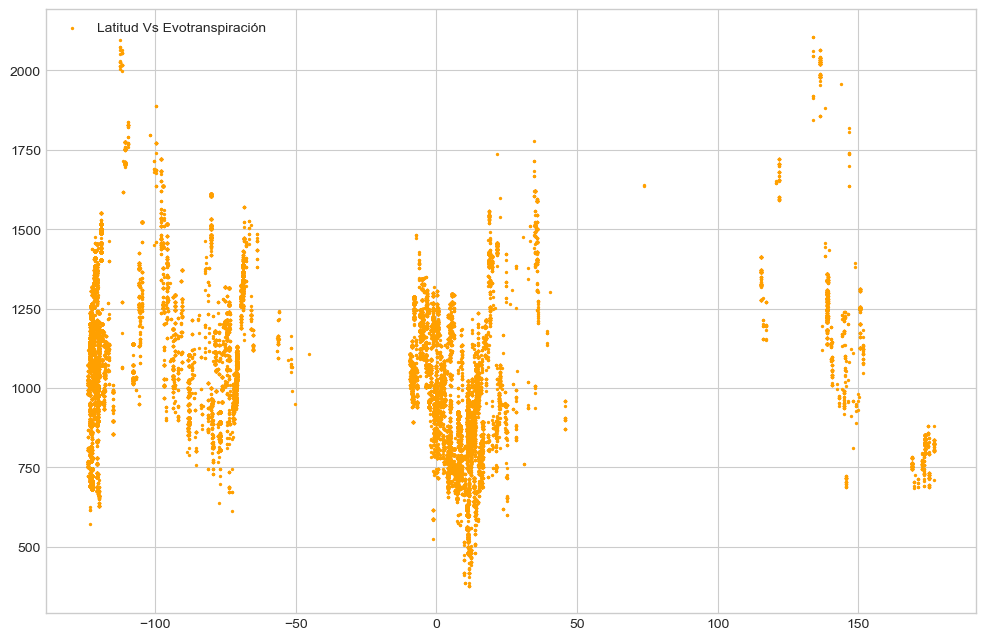

In [55]:
#Longitud vs. Evotranspiración
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Long_x'], df['etp_anual'], s=2, label="Latitud Vs Evotranspiración ", color="#FFA000")
plt.legend();
plt.show()

En el caso de la Evotranspiración se ve algo similar invertido que con la precipitación (vease la forma de N en el caso Americano), lo que permite deducir que a menor precipitación, los viñedos requieren mayor agua para sus cultivos. Esto permite plantear el riego del viñedo en los casos que la precipitación no sea la ideal

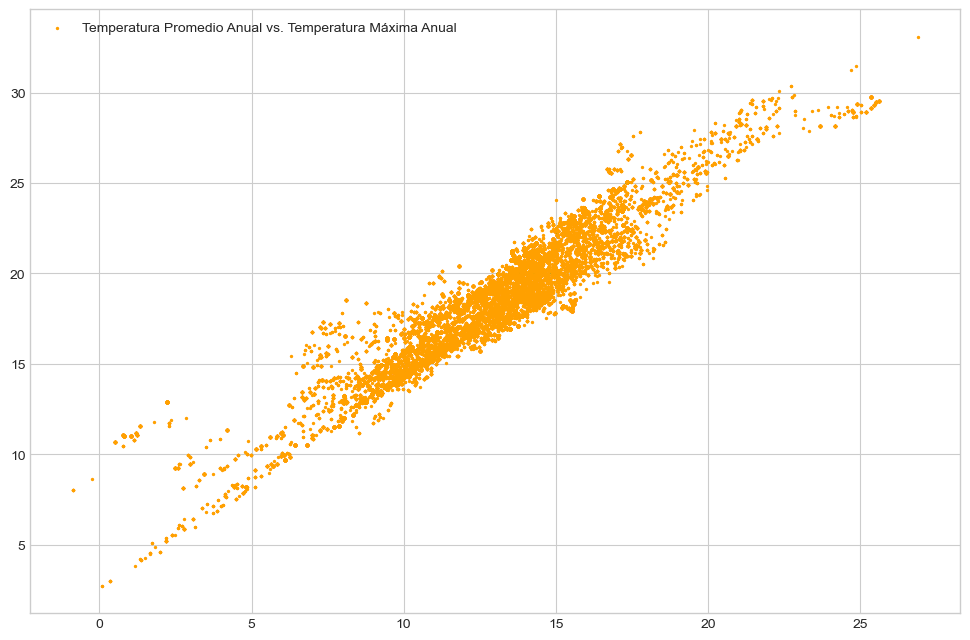

In [56]:
#Temperatura Promedio Anual vs. Temperatura Máxima Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['temp_anual'], df['temp_max_anual'], s=2, label="Temperatura Promedio Anual vs. Temperatura Máxima Anual", color="#FFA000")
plt.legend();
plt.show()

Tal como se esperaba, hay una correlación directa entre la temperatura anual promedio y la máxima. Por supuesto, existen algunos casos atípicos donde podemos ver que esta correlación varía, pero es posible que sea por zonas que tengan ciertos temas climatológicos especiales, por ejemplo zonas cerca a glaciares o rodeados por oceanos.

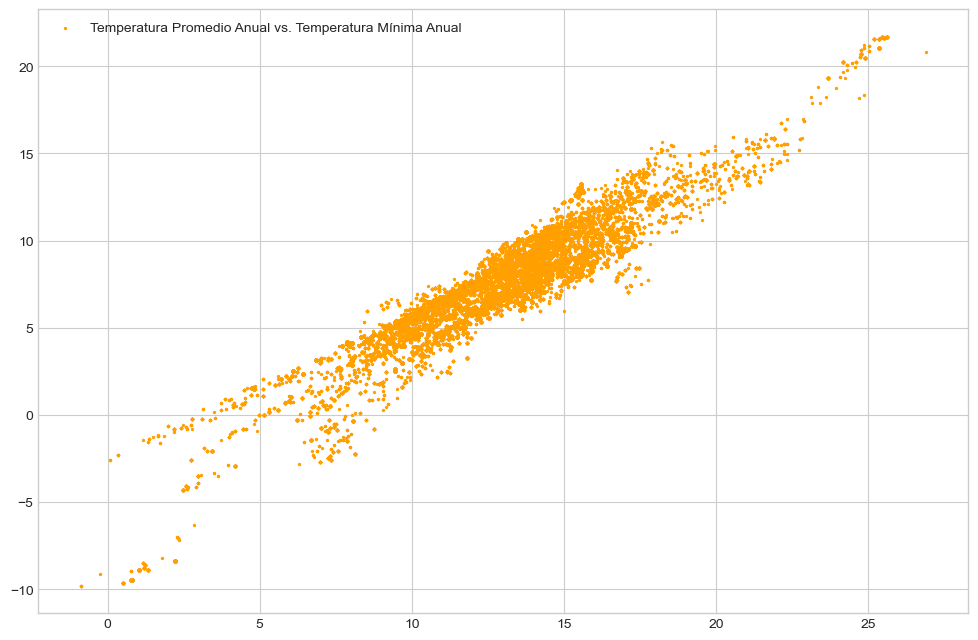

In [57]:
#Temperatura Promedio Anual vs. Temperatura Mínima Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['temp_anual'], df['temp_min_anual'], s=2, label="Temperatura Promedio Anual vs. Temperatura Mínima Anual", color="#FFA000")
plt.legend();
plt.show()

Tal como el análisis anterior, se encuentra una  correlación con algunos valores atípicos.

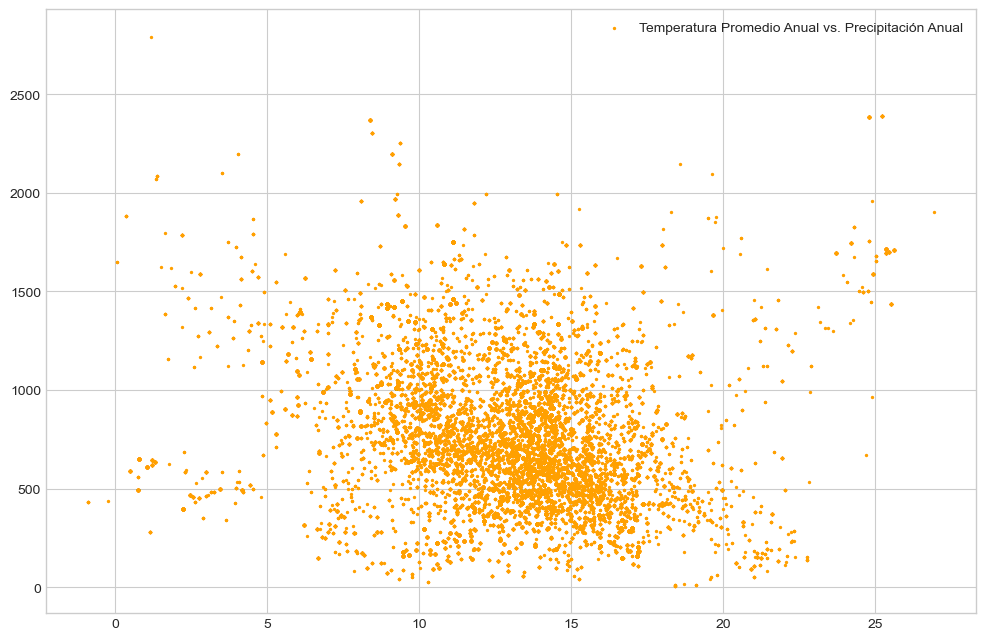

In [59]:
#Temperatura Promedio Anual vs. Precipitación Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['temp_anual'], df['pre_anual'], s=2, label="Temperatura Promedio Anual vs. Precipitación Anual", color="#FFA000")
plt.legend();
plt.show()

En este caso no se encuentra relación alguna entre la temperatura pormedio anual y la precipitación anual, solo se percibe una clusterización de los valores ideales.

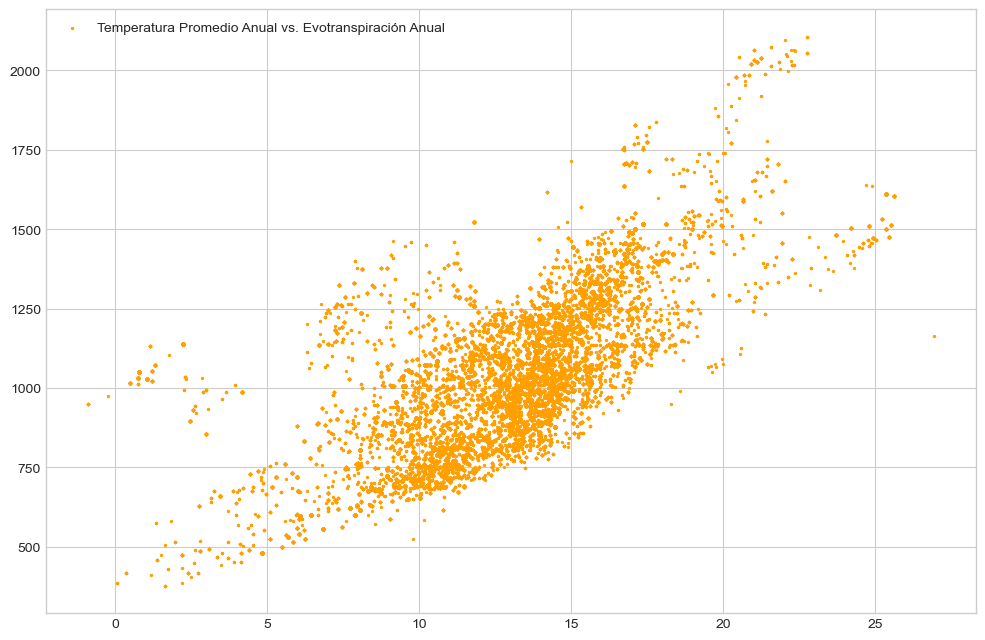

In [60]:
#Temperatura Promedio Anual vs. Evotranspiración Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['temp_anual'], df['etp_anual'], s=2, label="Temperatura Promedio Anual vs. Evotranspiración Anual", color="#FFA000")
plt.legend();
plt.show()

En este caso si es interesante ver cierta correlación entre los valores de temperatura promedio y evotranspiración; esto debido a que el agua que requiere el viñedo está relacionada con la evaporación y esta por la temperatura de la zona.

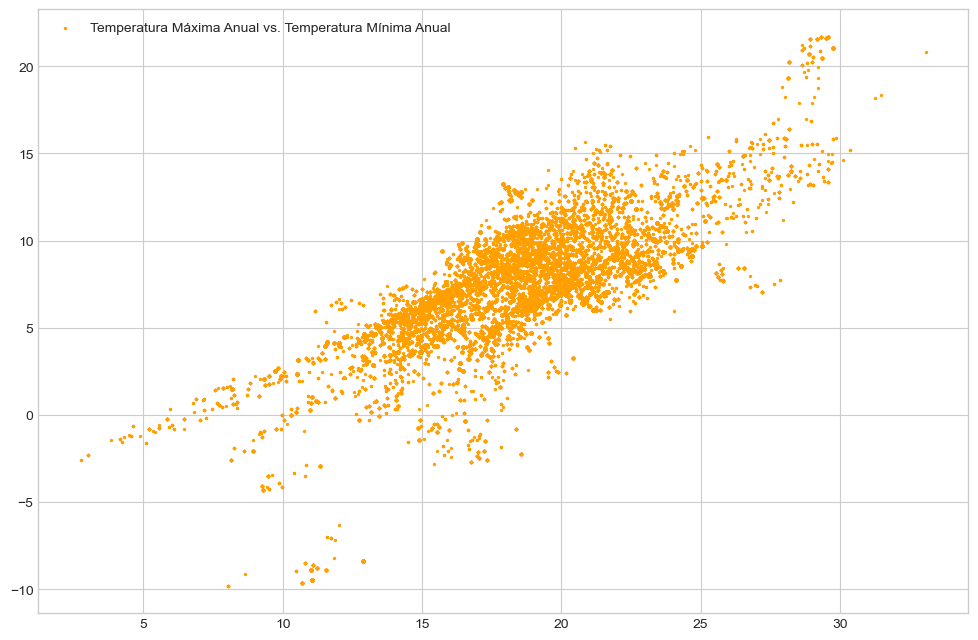

In [61]:
#Temperatura Máxima Anual vs. Temperatura Mínima Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['temp_max_anual'], df['temp_min_anual'], s=2, label="Temperatura Máxima Anual vs. Temperatura Mínima Anual", color="#FFA000")
plt.legend();
plt.show()

En este caso, se esperaba cierta correlación entre la temperatura máxima anual y mínima anual, debido a las zonas del muestreo y las estaciones, sin embargo la mayor parte deemperaturas se encuentran en la clusterización de datos en el centro

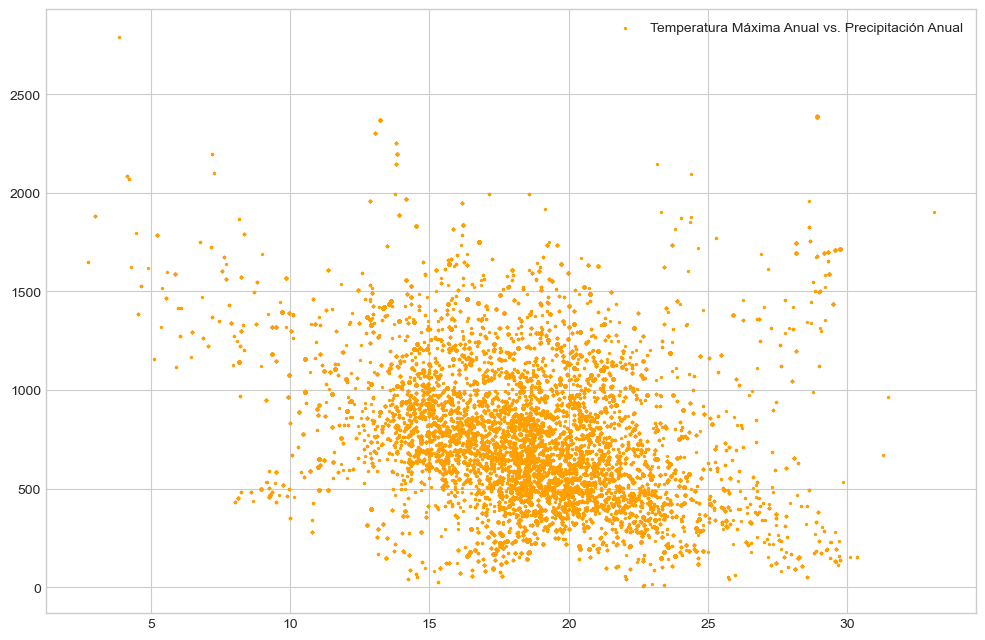

In [62]:
#Temperatura Máxima Anual vs. Precipitación Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['temp_max_anual'], df['pre_anual'], s=2, label="Temperatura Máxima Anual vs. Precipitación Anual", color="#FFA000")
plt.legend();
plt.show()

Se encuentra una leve correlación entre la Temperatura Máxima Anual y la precipitación aunque es demasiado leve, es más importante ver la clusterización de datos en el centro

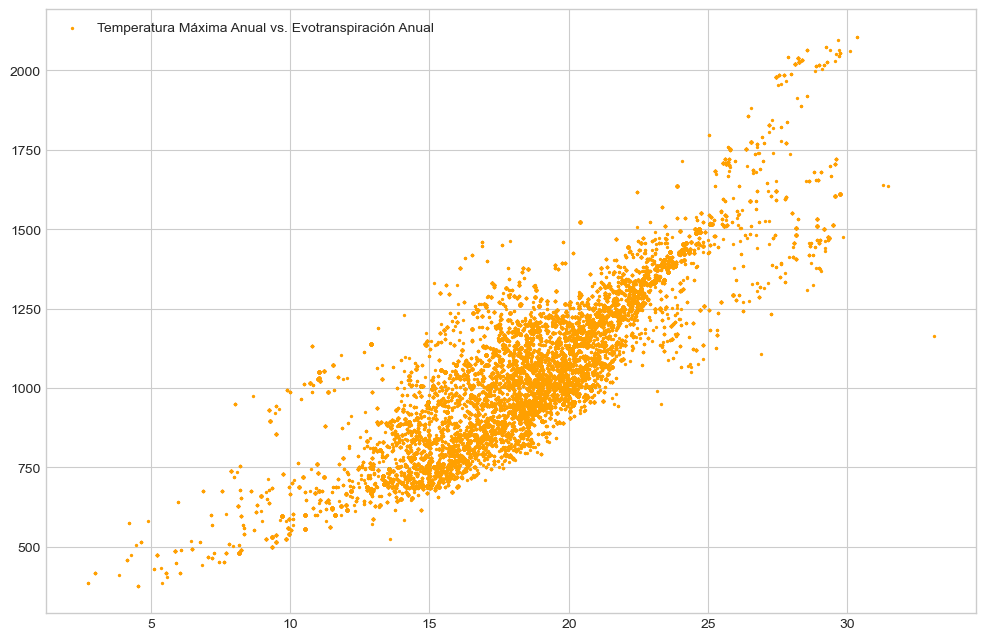

In [63]:
#Temperatura Máxima Anual vs. Evotranspiración Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['temp_max_anual'], df['etp_anual'], s=2, label="Temperatura Máxima Anual vs. Evotranspiración Anual", color="#FFA000")
plt.legend();
plt.show()

Al igual que con la temperatura promedio, se encuentra una correlación entre la temperatura máxima y la evotranspiración, a mayor temperatura, las plantas requieren mayor agua.

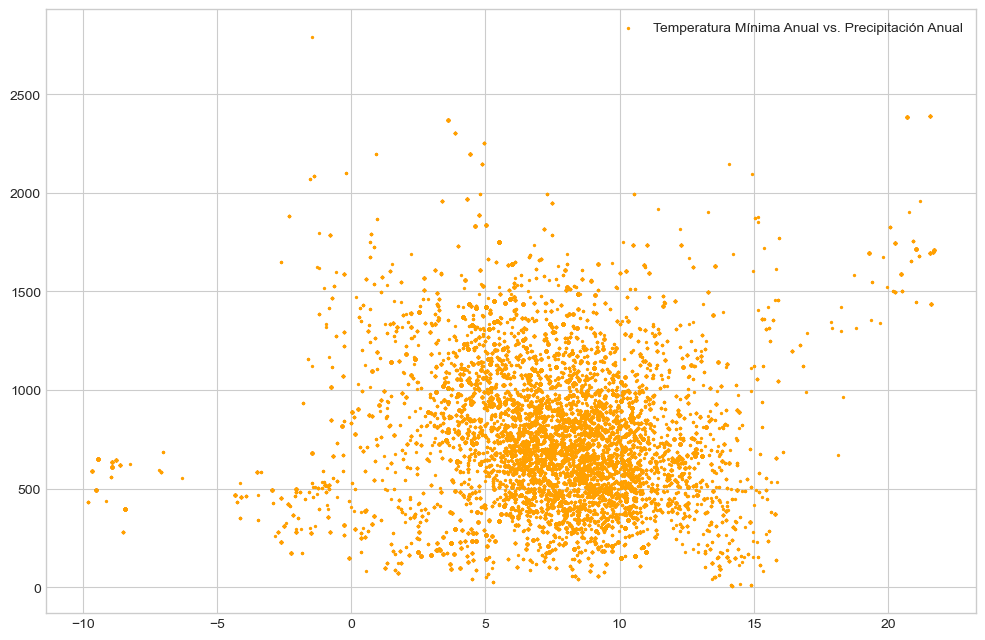

In [64]:
#Temperatura Mínima Anual vs. Precipitación Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['temp_min_anual'], df['pre_anual'], s=2, label="Temperatura Mínima Anual vs. Precipitación Anual", color="#FFA000")
plt.legend();
plt.show()

Nuevamente no se encuentra correlación entre la precipitación y la temperatura mínima anual, sin embargo es interezante ver la clusterización de datos

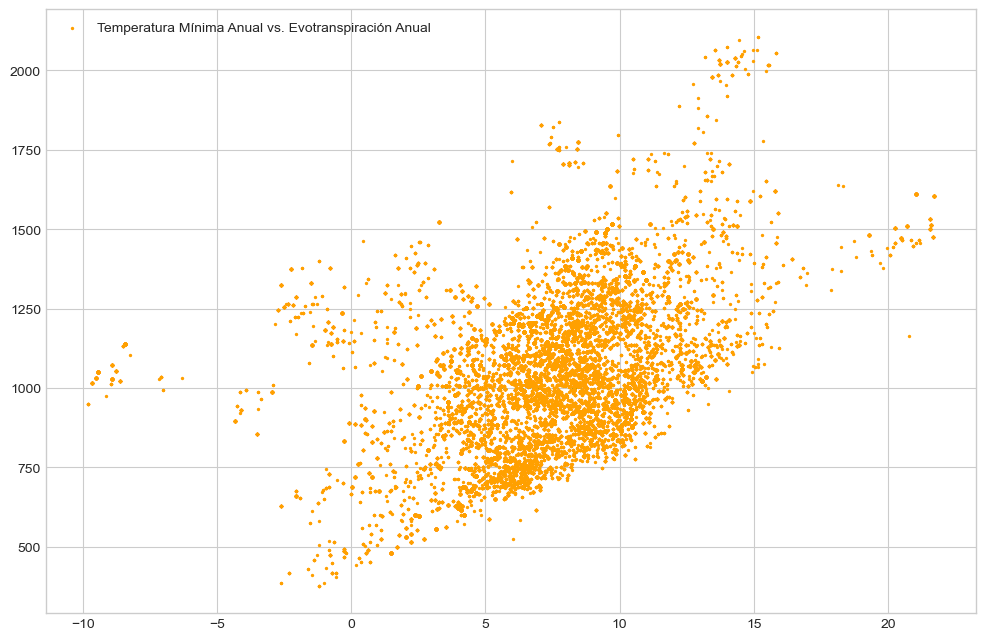

In [65]:
#Temperatura Máxima Anual vs. Evotranspiración Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['temp_min_anual'], df['etp_anual'], s=2, label="Temperatura Mínima Anual vs. Evotranspiración Anual", color="#FFA000")
plt.legend();
plt.show()

Aunque en este caso no es tan claro, se encuentra cierta correlación entre la temperatura mínima anual y la evotranspiración. La parte de temperaturas bajo cero con mayor evotranspiración se puede deber a que el agua congelada no puede ser apropiadamente por las plantas y en este caso van a requerir más agua

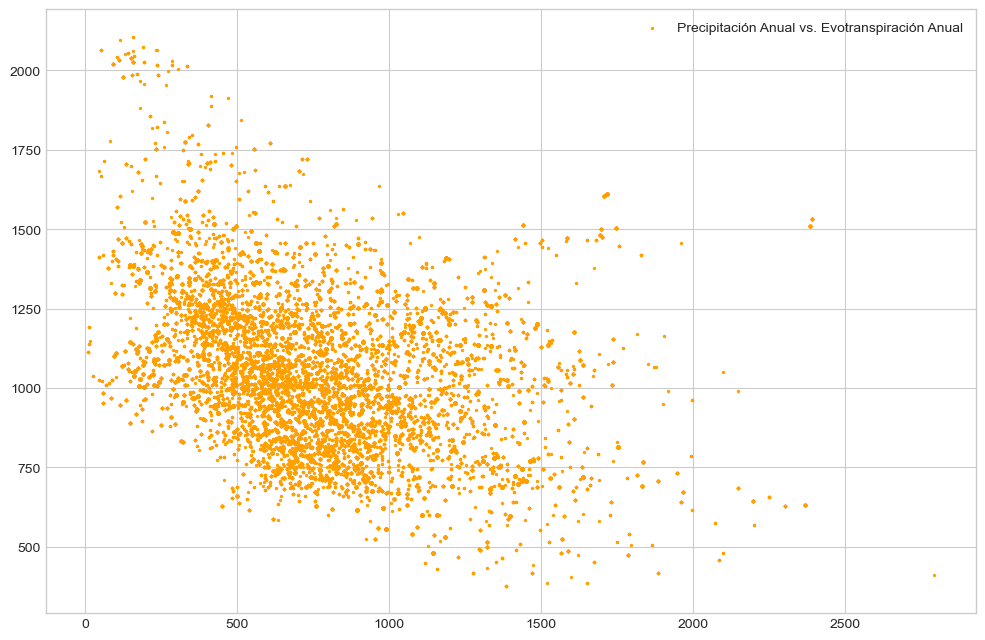

In [66]:
#Precipitación Anual vs. Evotranspiración Anual
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['pre_anual'], df['etp_anual'], s=2, label="Precipitación Anual vs. Evotranspiración Anual", color="#FFA000")
plt.legend();
plt.show()

Por último, se encuentra cierta relación entre la precipitación y la evotranspiración, ya que la evotranspiración depende de la precipitación. A mayor cantidad de lluvias, las plantas requieren menor agua, posiblemente por la humedad. Es posible tambié entender ciertos niveles atípicos por el análisis anteriormente mencionado, donde algunas zonas pueden tener condiciones de congelamiento de agua que puede no ser apropiado para la absorción del agua

## Visualizacion

### Histogramas

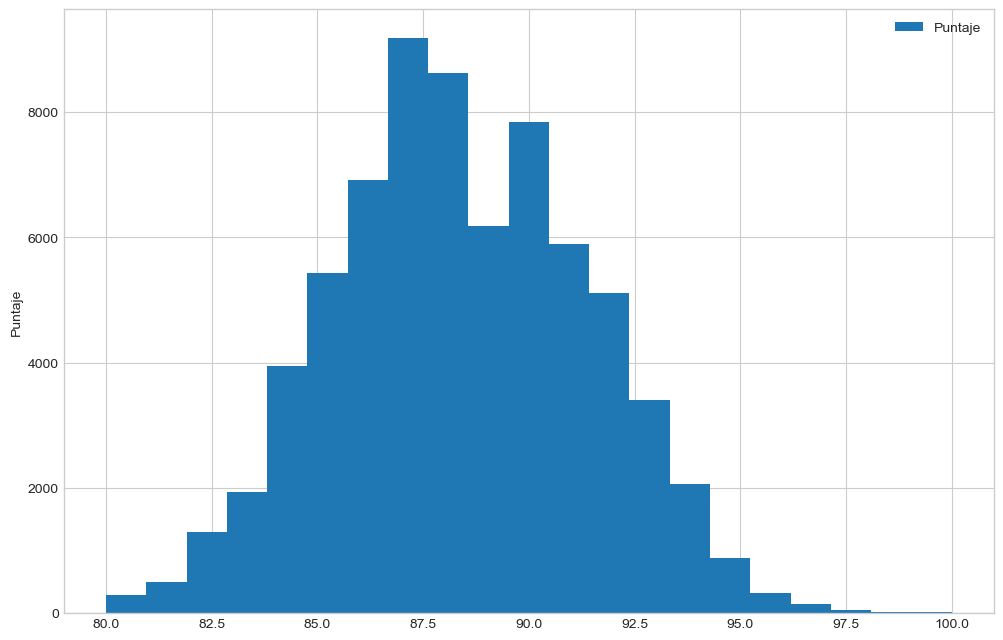

In [11]:
#Histograma de Puntos
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['points'], bins=21, label="Puntaje")
plt.legend()
plt.ylabel("Puntaje");

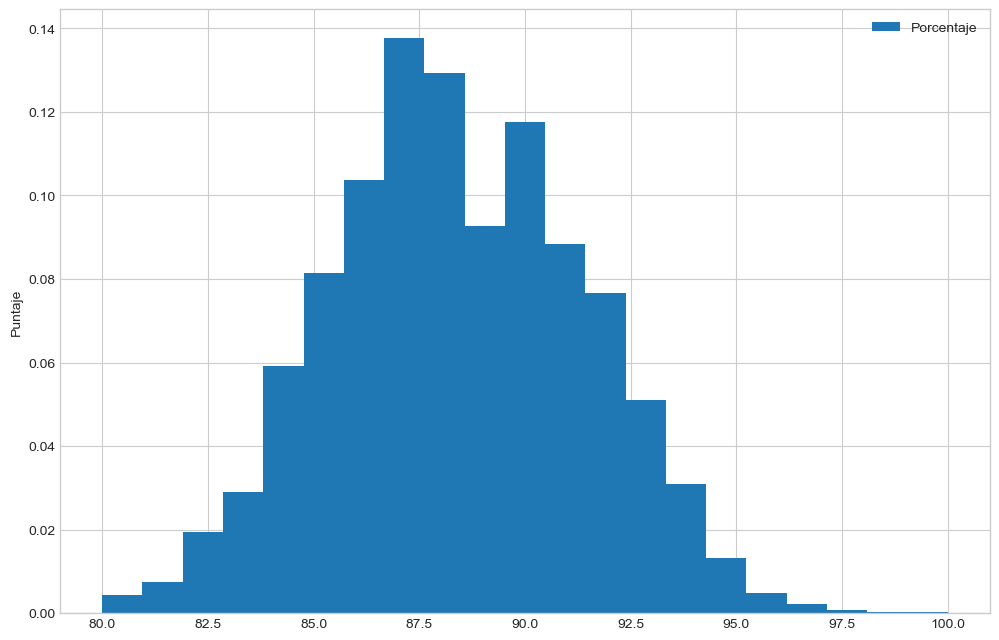

In [12]:
#Puntaje en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['points'], bins=21, label="Porcentaje", density=True)
plt.legend()
plt.ylabel("Puntaje");



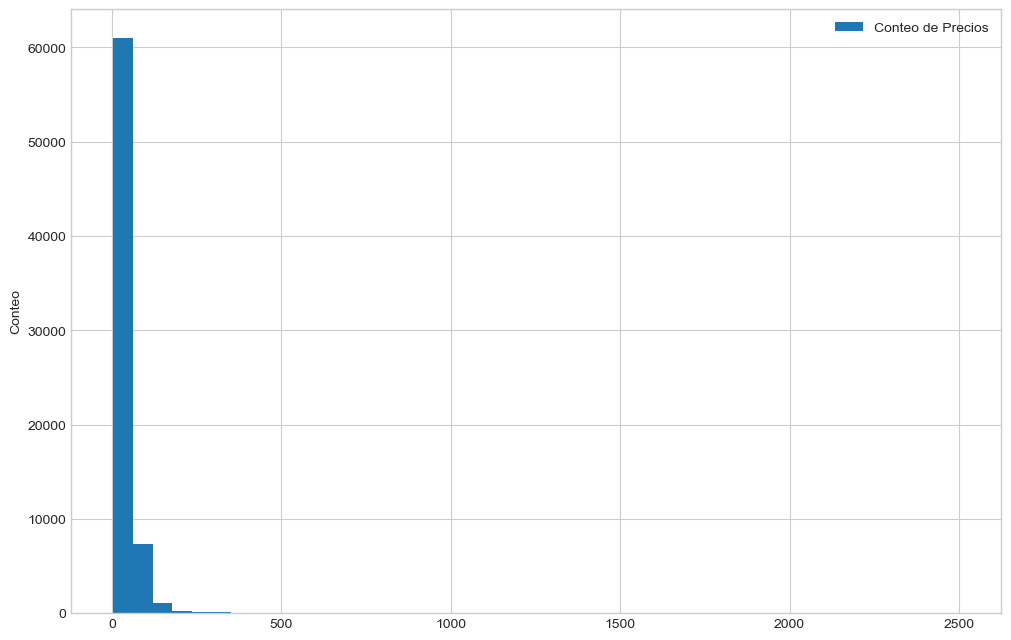

In [13]:
#Histograma de Precios
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['price'], bins=43, label="Conteo de Precios")
plt.legend()
plt.ylabel("Conteo");

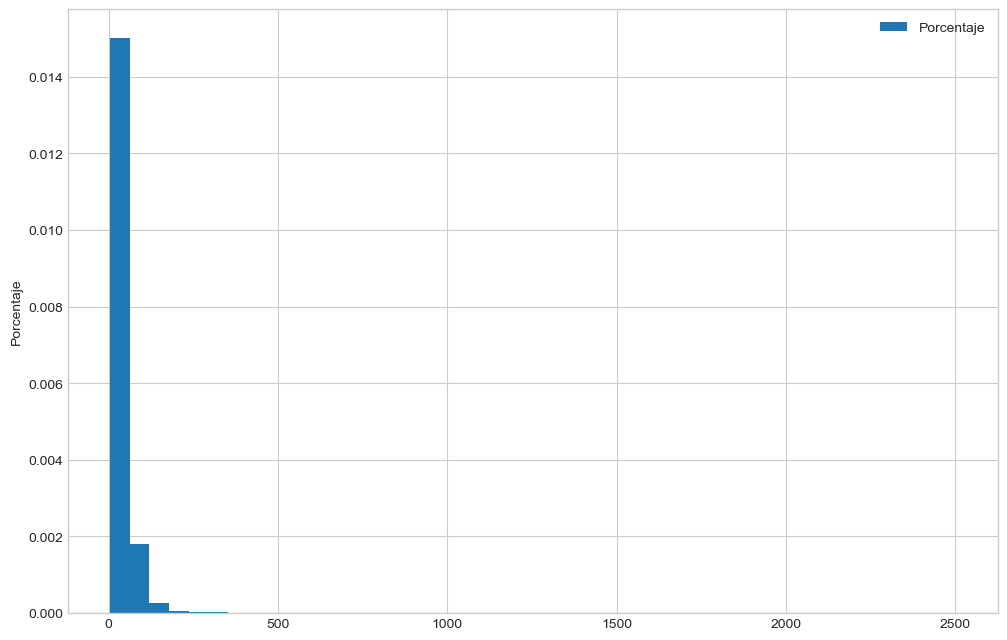

In [14]:
#Precio en porcentajes, por que no muestra los porcentajes correctos?
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['price'], bins=43, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

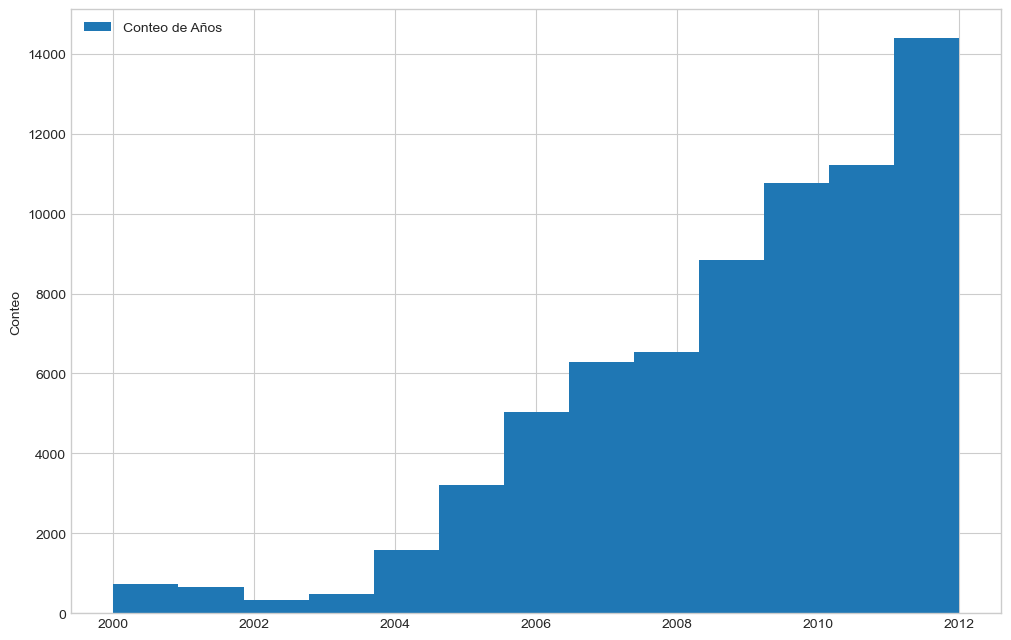

In [15]:
#Histograma de Años
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['Year'], bins=13, label="Conteo de Años")
plt.legend()
plt.ylabel("Conteo");

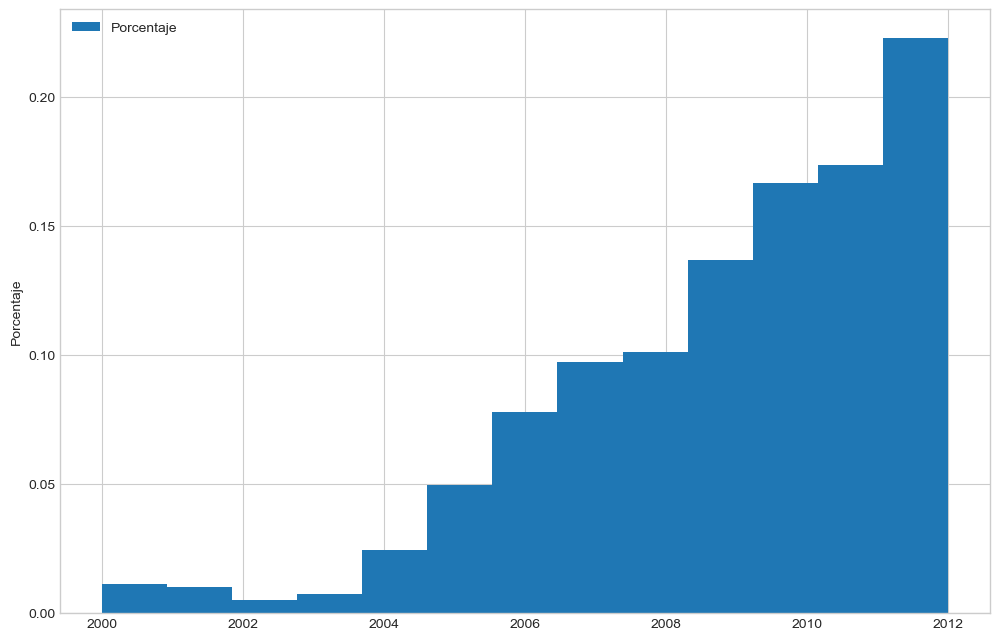

In [16]:
#Años en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['Year'], bins=13, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

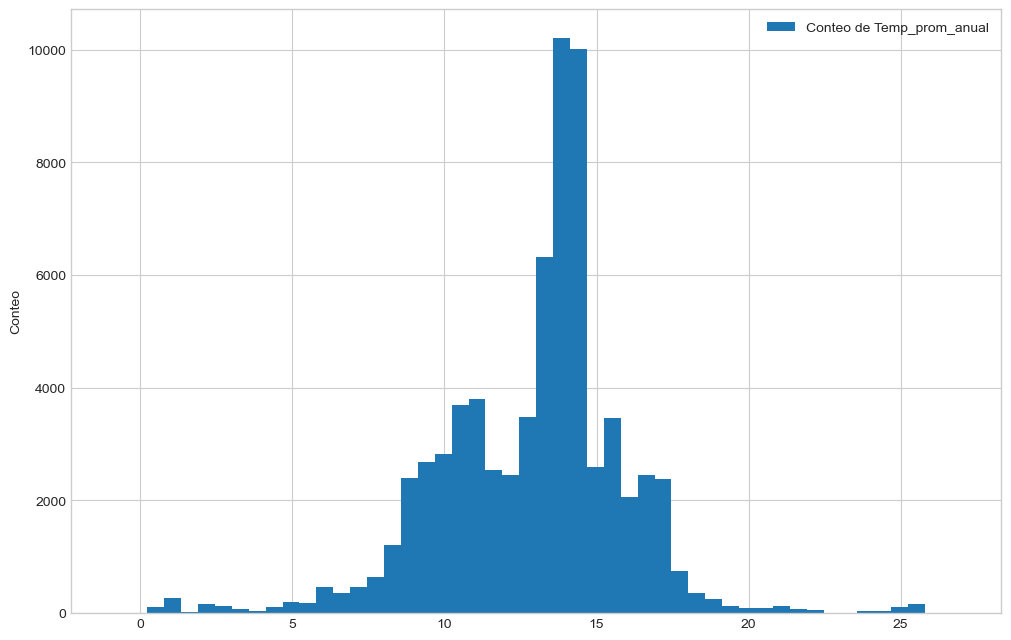

In [17]:
#Histograma de Temperatura promedio anual
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['temp_anual'], bins=50, label="Conteo de Temp_prom_anual")
plt.legend()
plt.ylabel("Conteo");

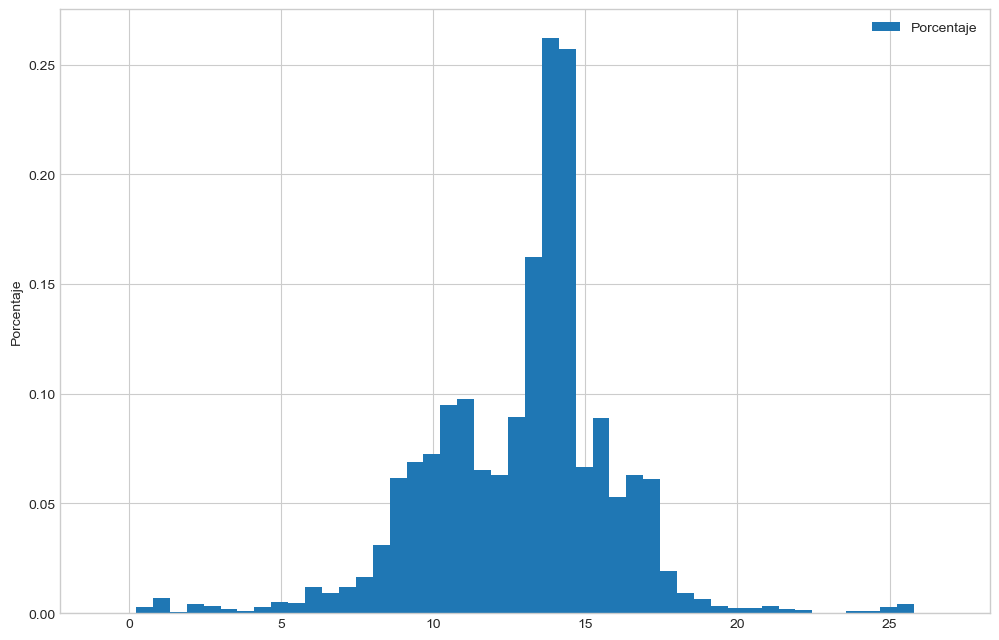

In [18]:
#Temp_anual en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['temp_anual'], bins=50, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

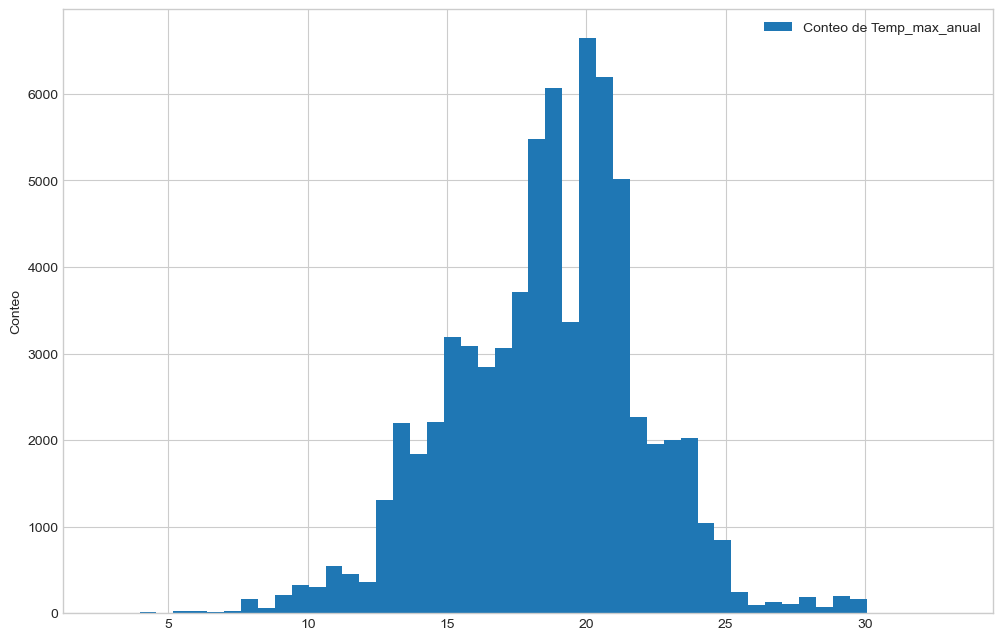

In [19]:
#Histograma de Temperatura maxima anual
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['temp_max_anual'], bins=50, label="Conteo de Temp_max_anual")
plt.legend()
plt.ylabel("Conteo");

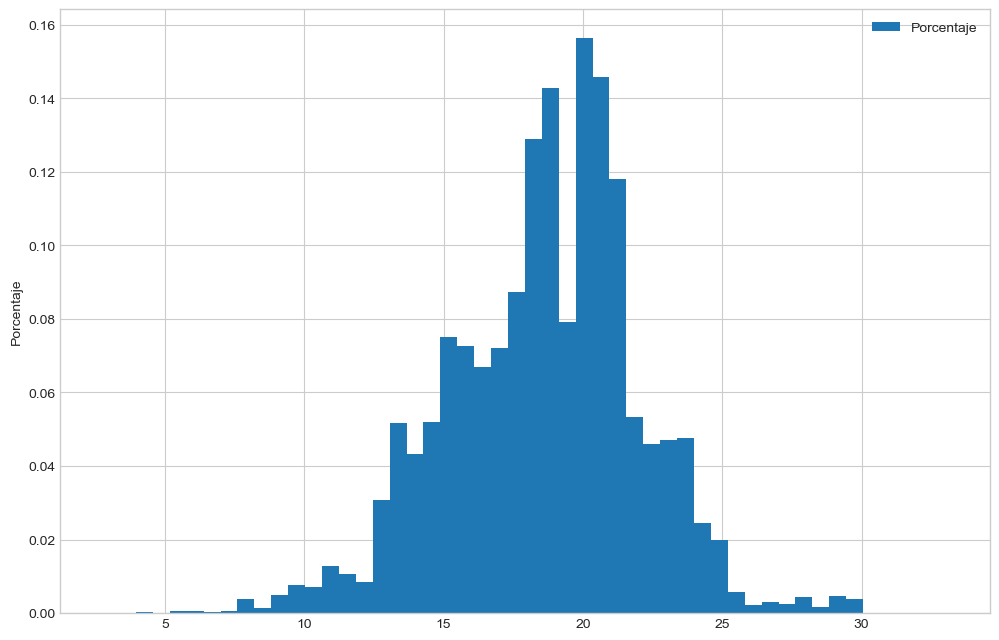

In [20]:
#Temp_max_anual en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['temp_max_anual'], bins=50, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

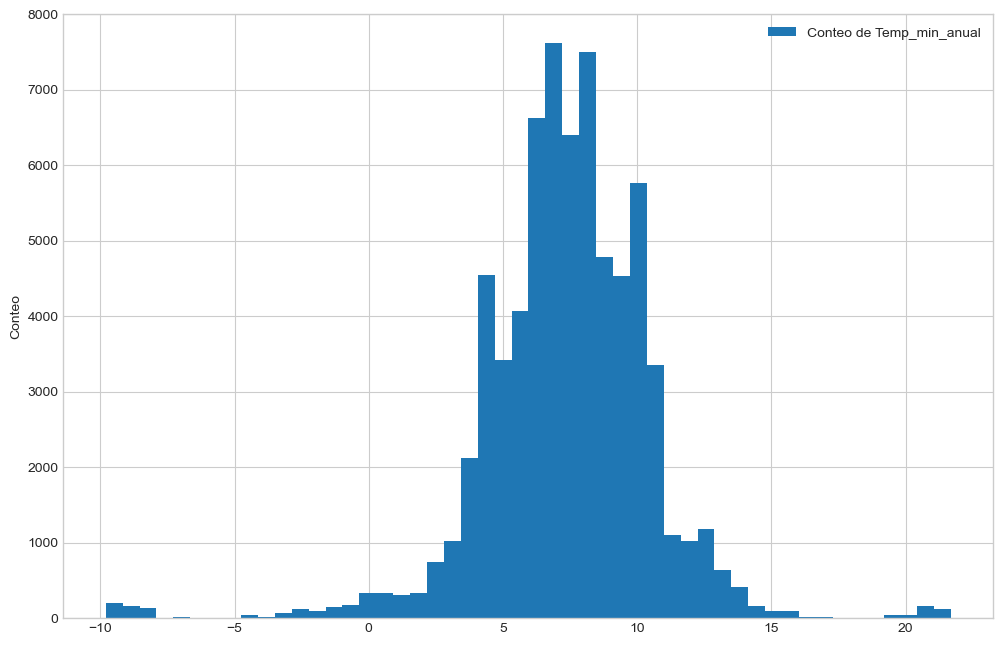

In [21]:
#Histograma de Temperatura mínima anual
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['temp_min_anual'], bins=50, label="Conteo de Temp_min_anual")
plt.legend()
plt.ylabel("Conteo");

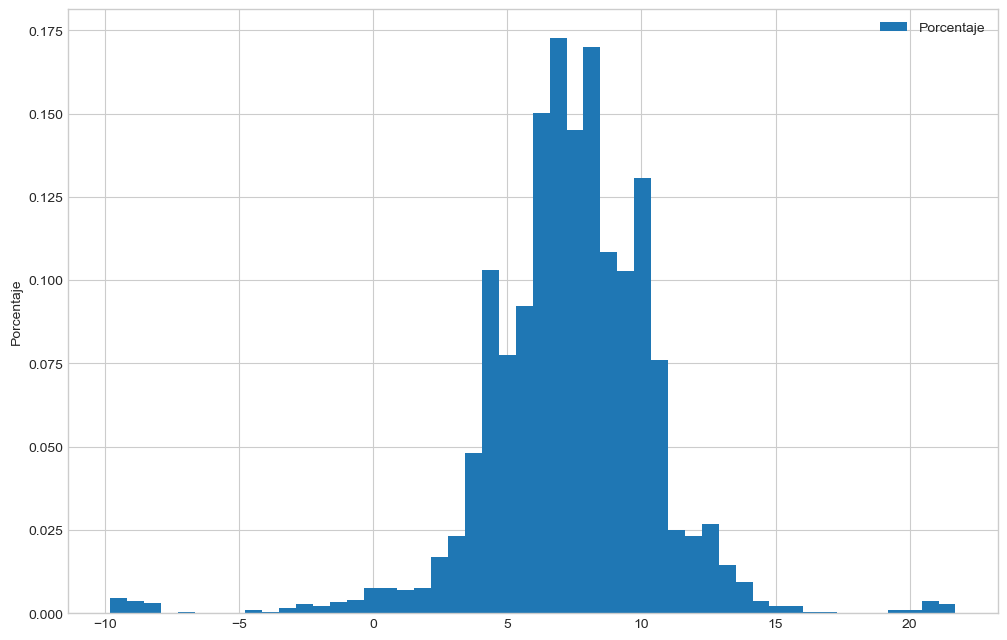

In [22]:
#Temp_min_anual en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['temp_min_anual'], bins=50, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

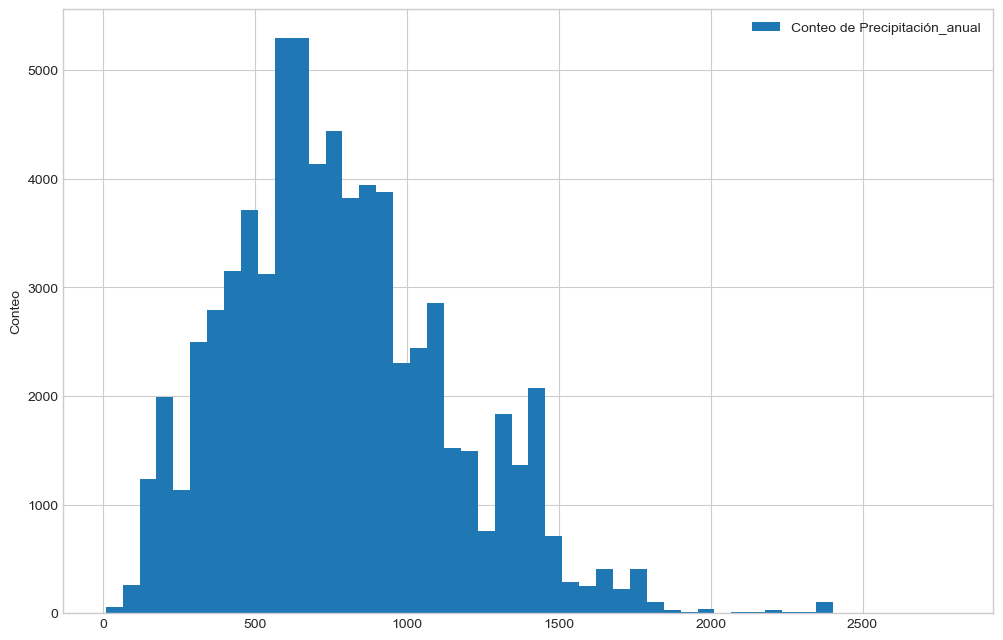

In [23]:
#Histograma de precipitación anual
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['pre_anual'], bins=50, label="Conteo de Precipitación_anual")
plt.legend()
plt.ylabel("Conteo");

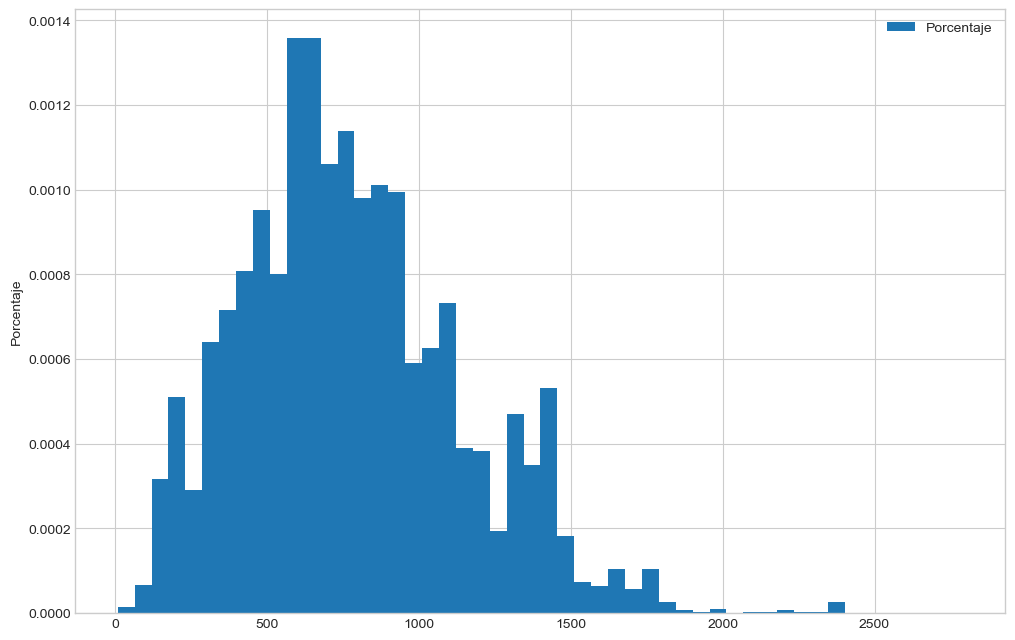

In [24]:
#Precipitación_anual en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['pre_anual'], bins=50, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

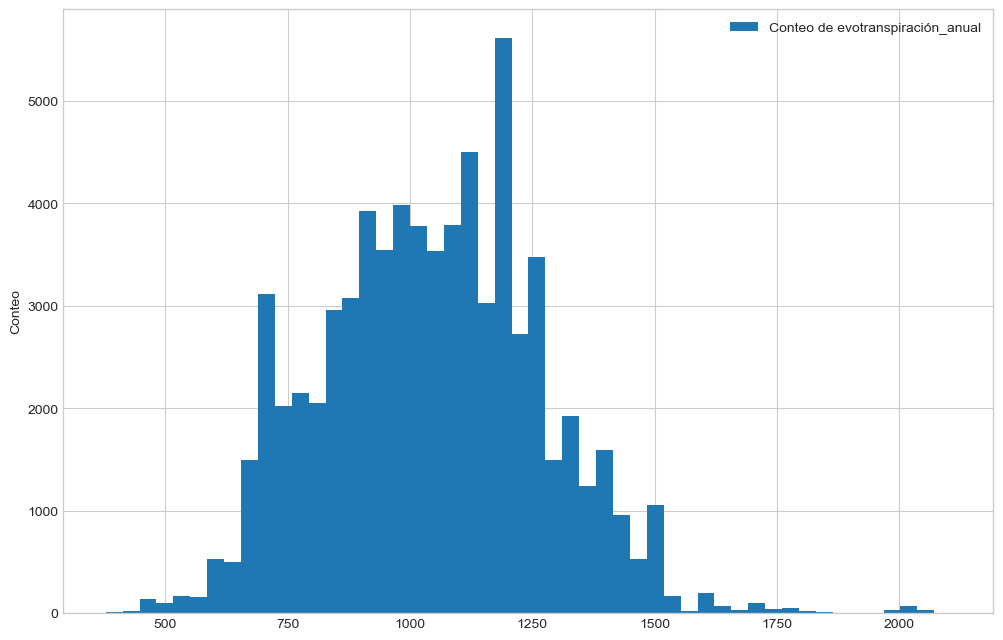

In [25]:
#Histograma de evotranspiración anual
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['etp_anual'], bins=50, label="Conteo de evotranspiración_anual")
plt.legend()
plt.ylabel("Conteo");

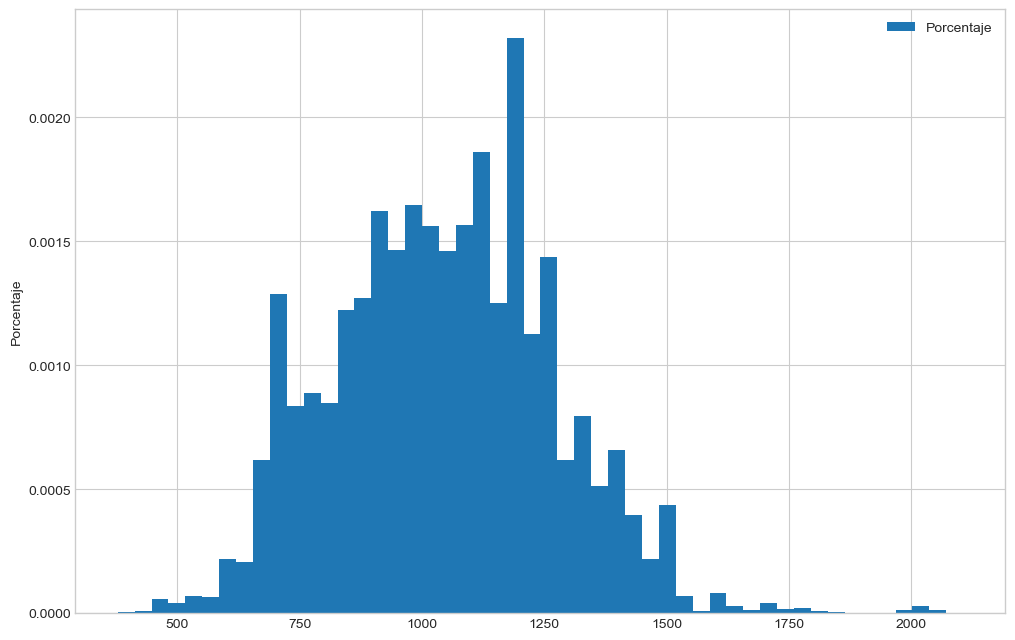

In [26]:
#evotranspiración_anual en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['etp_anual'], bins=50, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

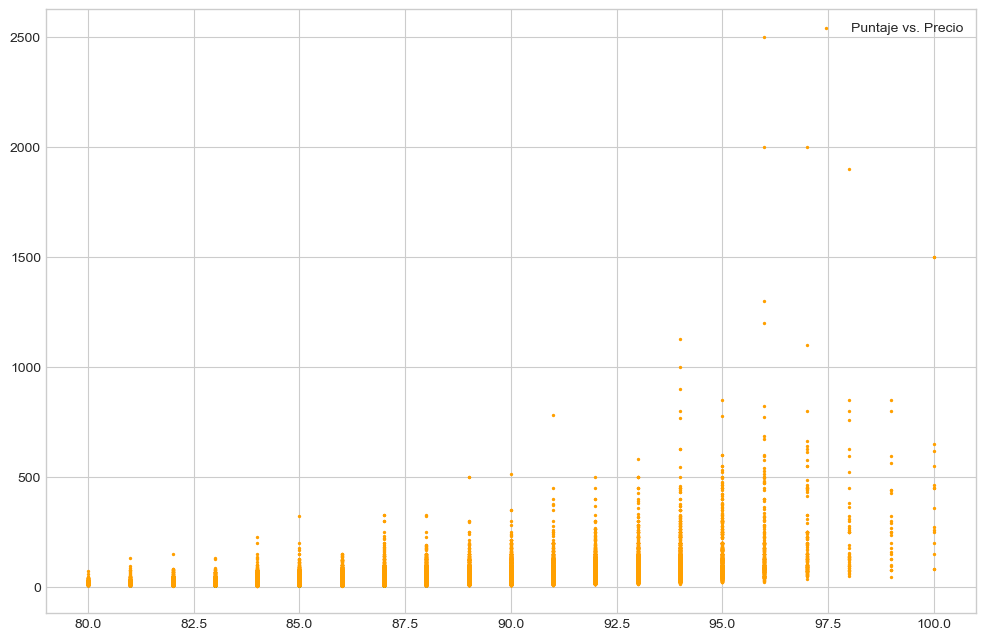

In [27]:
#Scatter entre puntaje y precios
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['price'], s=2, label="Puntaje vs. Precio", color="#FFA000")
plt.legend();
plt.show()

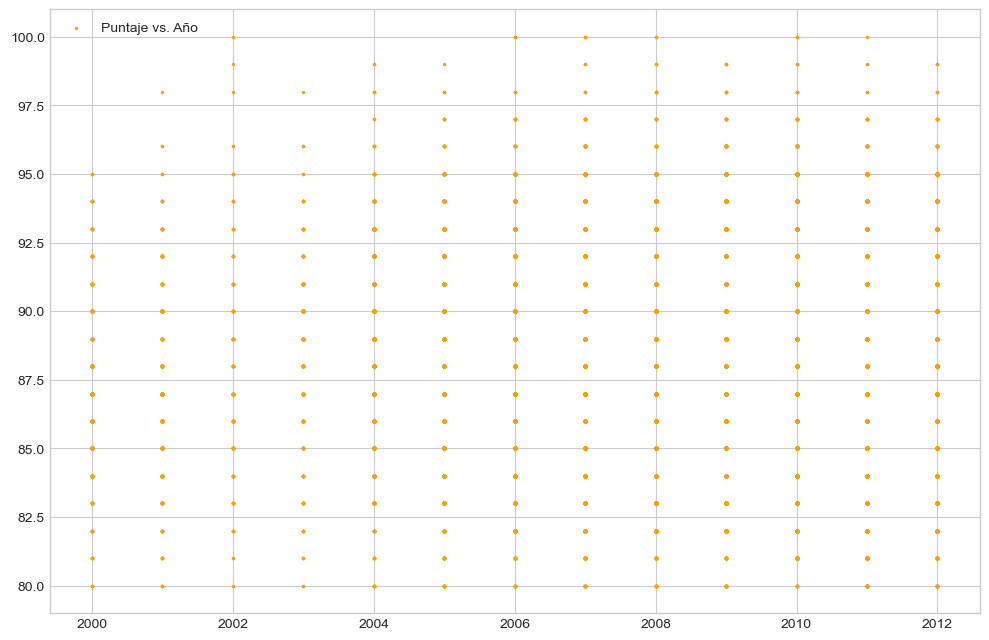

In [28]:
#Scatter entre puntaje y año
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Year'], df['points'], s=2, label="Puntaje vs. Año", color="#FFA000")
plt.legend();
plt.show()

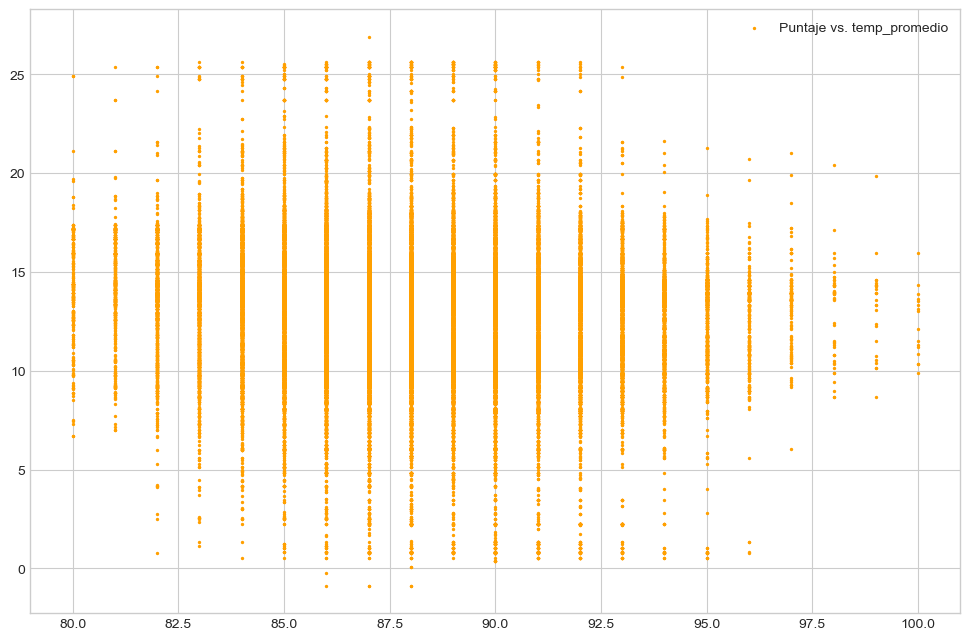

In [29]:
#Scatter entre puntaje y temperatura
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['temp_anual'], s=2, label="Puntaje vs. temp_promedio", color="#FFA000")
plt.legend();
plt.show()

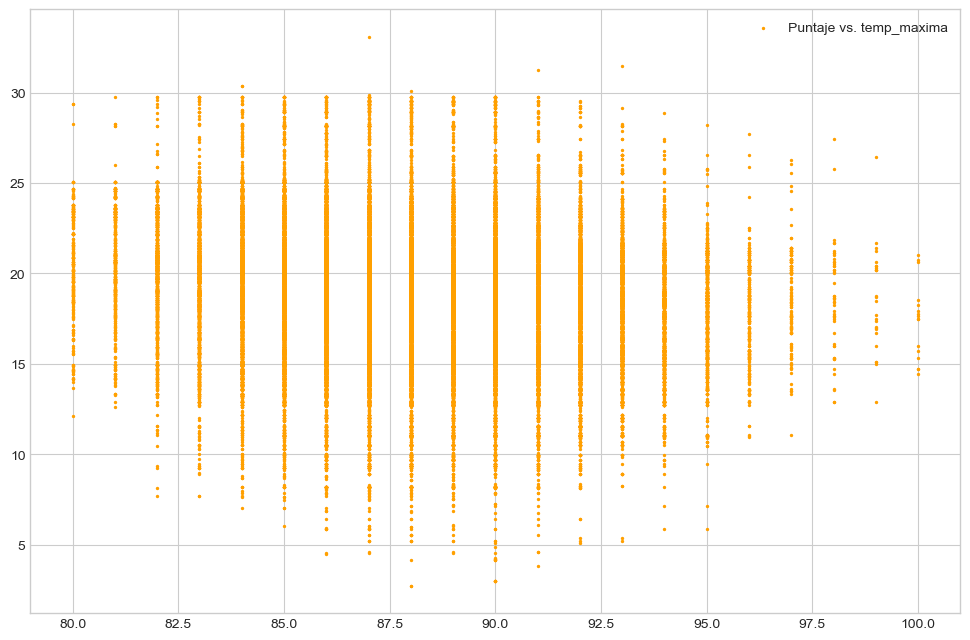

In [30]:
#Scatter entre puntaje y temperatura máxima
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['temp_max_anual'], s=2, label="Puntaje vs. temp_maxima", color="#FFA000")
plt.legend();
plt.show()

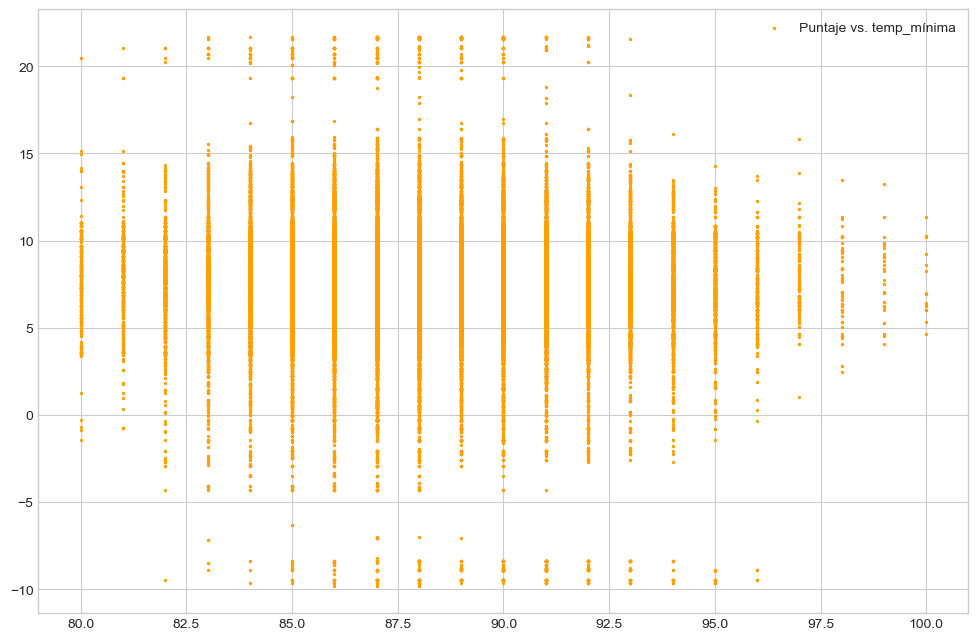

In [31]:
#Scatter entre puntaje y temperatura mínima
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['temp_min_anual'], s=2, label="Puntaje vs. temp_mínima", color="#FFA000")
plt.legend();
plt.show()

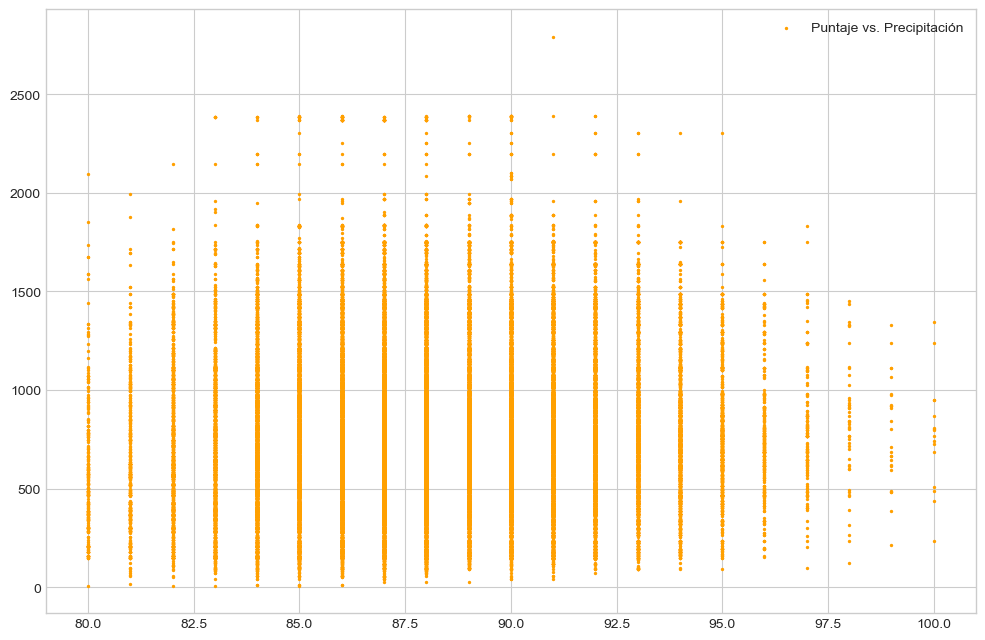

In [32]:
#Scatter entre puntaje y precipitación
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['pre_anual'], s=2, label="Puntaje vs. Precipitación", color="#FFA000")
plt.legend();
plt.show()

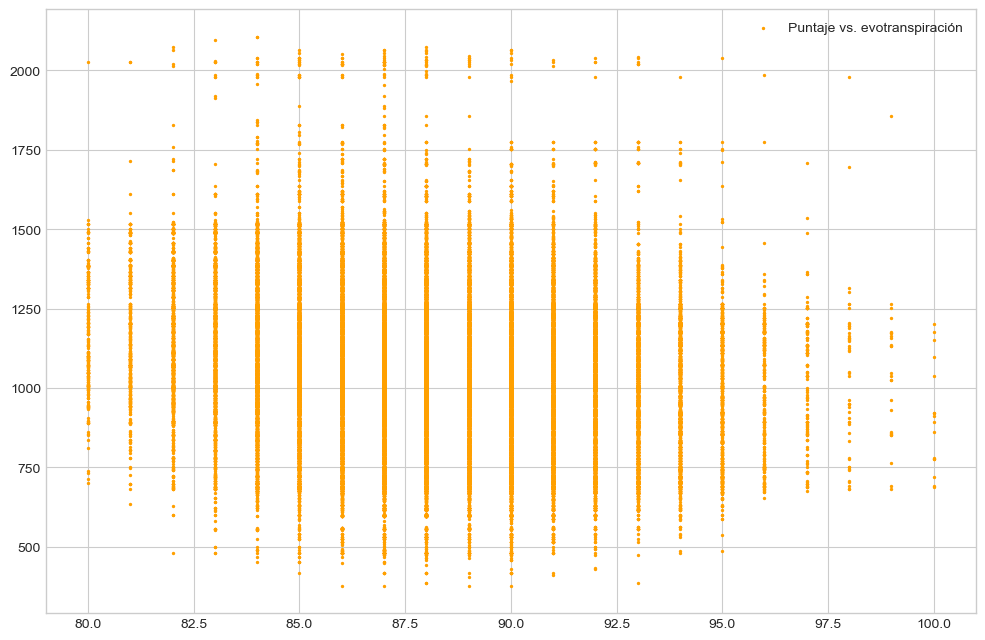

In [33]:
#Scatter entre puntaje y evotranspiración
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['etp_anual'], s=2, label="Puntaje vs. evotranspiración", color="#FFA000")
plt.legend();
plt.show()

# Histrogramas

### Latitudes Vs. Puntajes

Se utilizará, basandose en la ley de pareto, las calificaciones del 20% de los mejores vinos. Para esto, como los vinos son calificados de 80 a 100, el 20% es el puntaje de 96 a 100. Con esta información, separamos las diferentes zonas de Latitudes con respecto a los trópicos, los cuales determinan las zonas de calor.

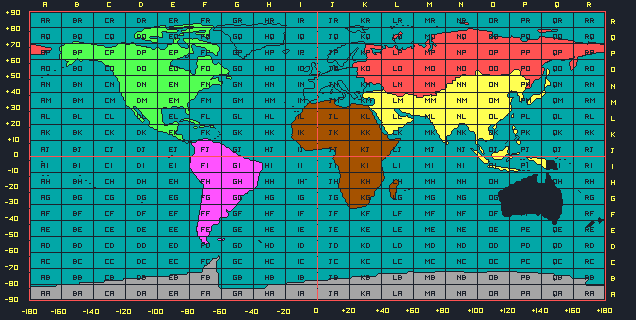

Con esto, realizamos el cruce gráfico de estas zonas, buscando ciertas conclusiones sobre las zonas geográficas contra la calidad de los vinos. No se graficarán datos sobre los círculos árticos y antárticos ya que no se encuentra información en nuestra base de datos de algún vino en estas zonas 

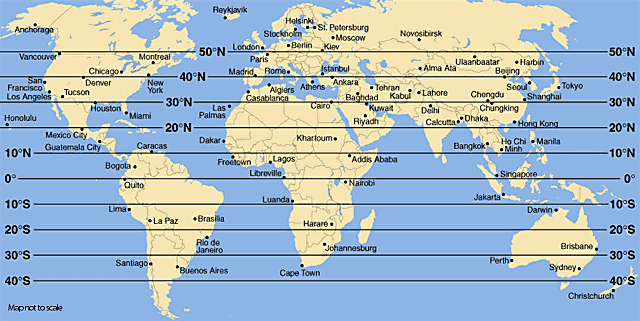

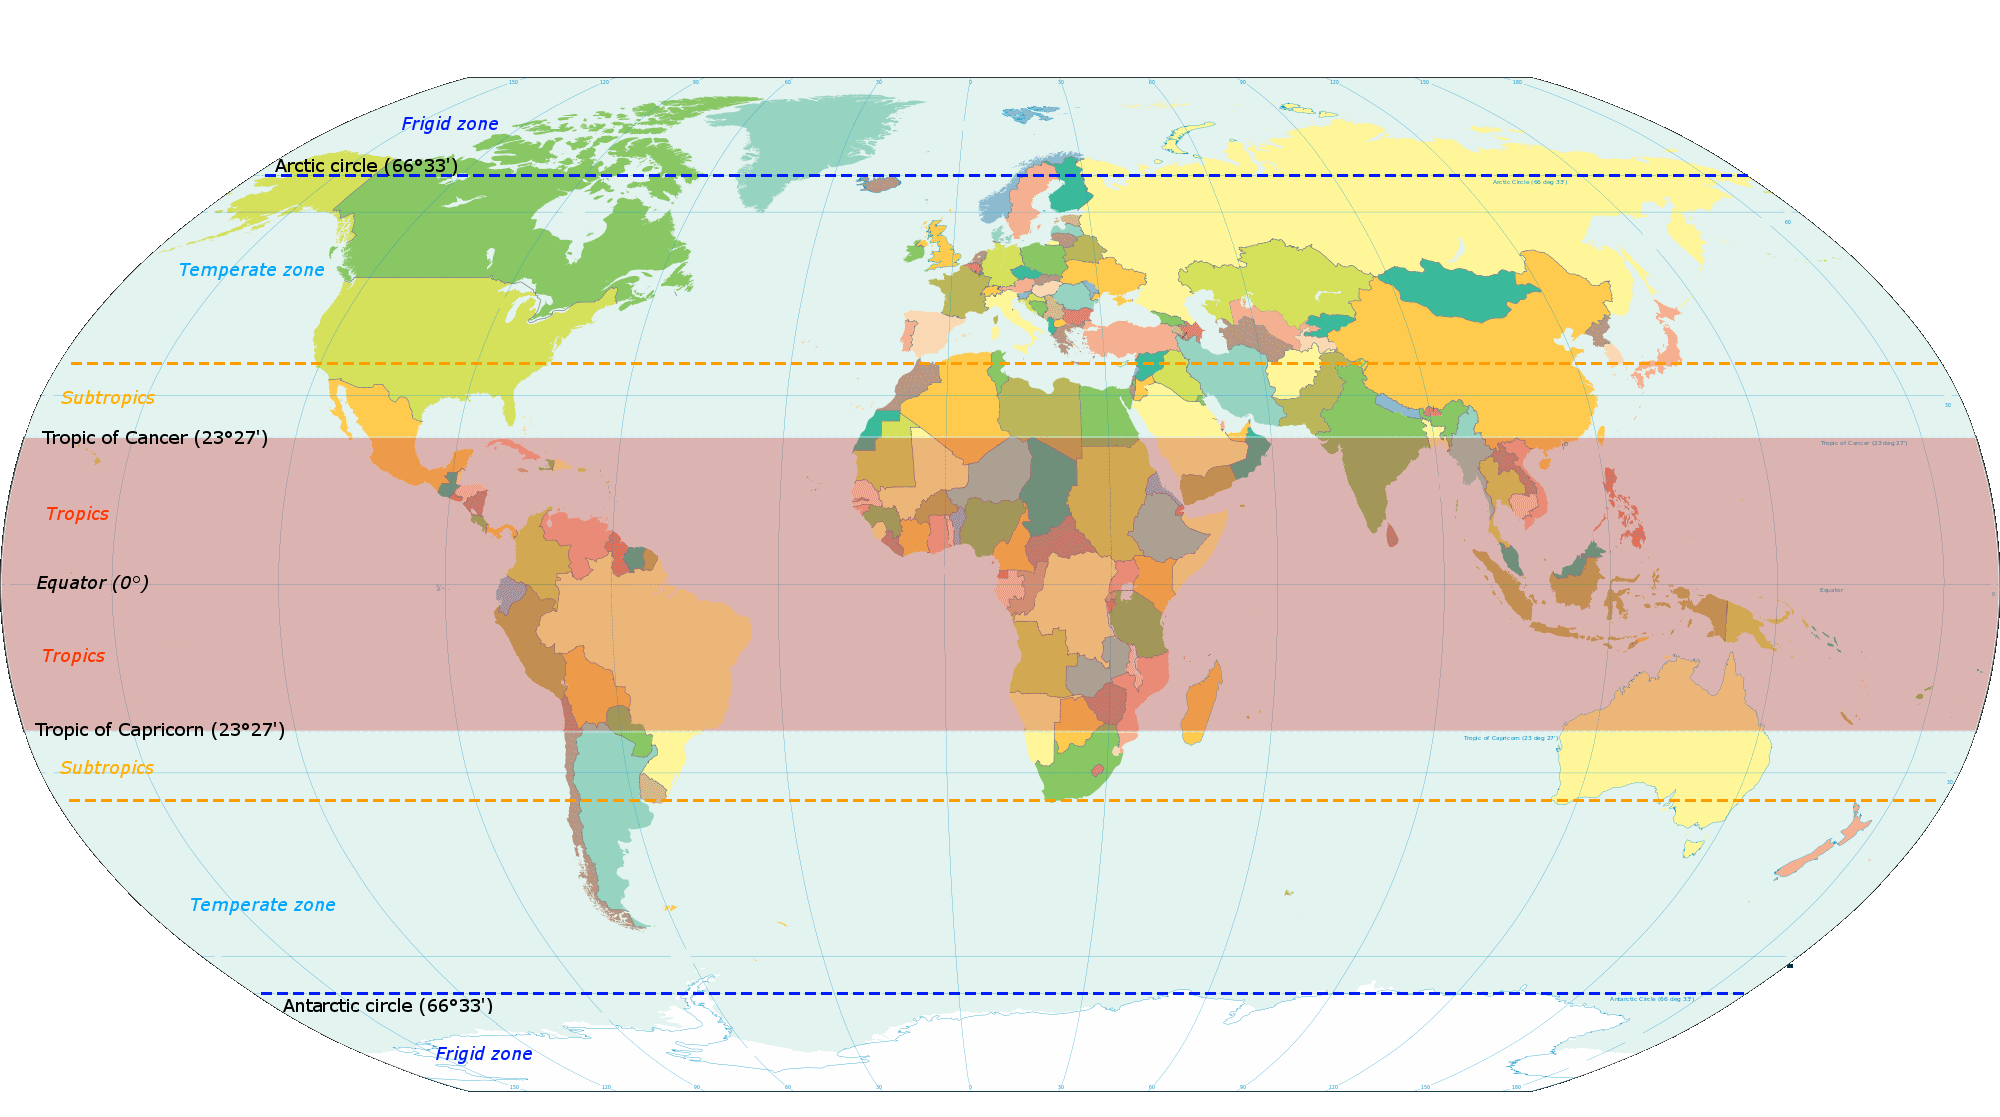

In [34]:
#Se carga la información en EDA
eda = df_simple

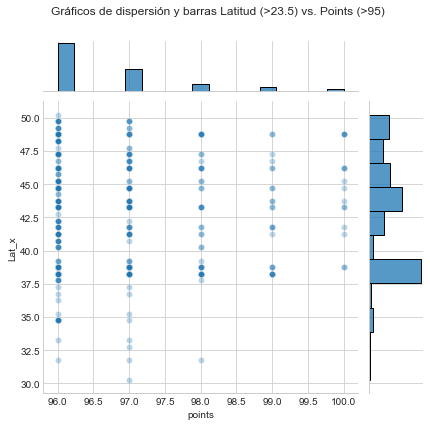

In [35]:
#Trópico de Cancer
df = eda[(eda.points>95) & (eda.Lat_x>23.5)]
p = sns.jointplot(x=df.points,y=df.Lat_x, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Latitud (>23.5) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** Se encuentra una mayor concentración de vinos de buena calidad en las latitudes cercanas a los 38°, 44°, 45° y 46°; esta característica tambien se puede percibir ligeramente con los vinos de puntaje 99 y 100, con buenos vinos en los 49°

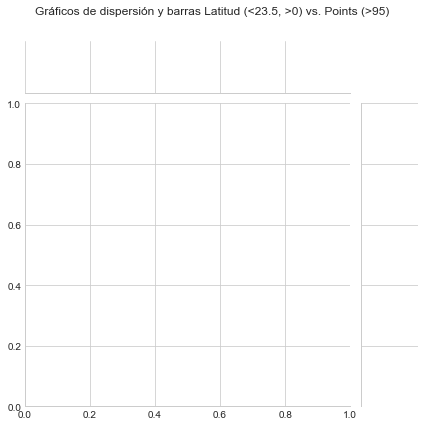

In [36]:
#Ecuador Norte
df = eda[(eda.points>95) & (eda.Lat_x<23.5) & (eda.Lat_x>0)]
p = sns.jointplot(x=df.points,y=df.Lat_x, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Latitud (<23.5, >0) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** No se enceuntra ningún vino en esta zona. Esto muestra que la zona del Ecuador Norte no posee buenas zonas y/o condiciones para sembrar vinos

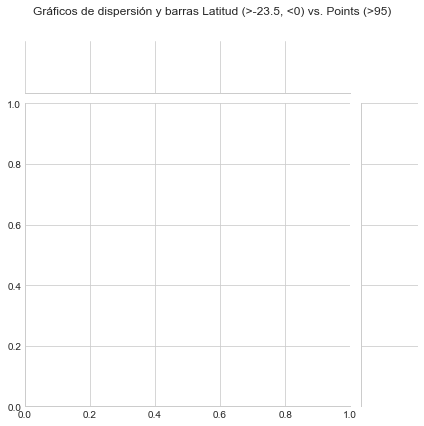

In [37]:
#Ecuador Sur
df = eda[(eda.points>95) & (eda.Lat_x>-23.5) & (eda.Lat_x<0)]
p = sns.jointplot(x=df.points,y=df.Lat_x, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Latitud (>-23.5, <0) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** No se encuentra ningún vino en esta zona. Esto muestra que la zona del Ecuador Norte no posee buenas zonas y/o condiciones para sembrar vinos

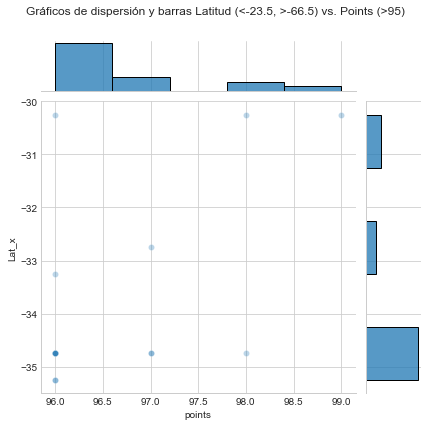

In [38]:
#Trópico de Capricornio
df = eda[(eda.points>95) & (eda.Lat_x<-23.5) & (eda.Lat_x>-66.5)]
p = sns.jointplot(x=df.points,y=df.Lat_x, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Latitud (<-23.5, >-66.5) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** En este gráfico se encuentra un número bajo de calificaciones, debido a que la cantidad de muestras es mucho mayor en la zona norte a comparación de la zona sur. En este caso, se ve que los mejores vinos se encuentran alrededor de los -35°/-36° hacia el sur.

### Longitudes Vs. Puntaje

Se realiza el análisis análogo al de Latitudes, esta vez no se tienen zonas para los meridianos, por lo que se separarán en las siguientes zonas:
1. Este USA (EU): -160° a -100°
2. Oeste USA y LATAM (OUL): -100° a -20°
3. Este Europa y Africa (EEA): -20° a 30°
4. Oeste Europa y Emiratos Árabes (OEEA): 30° a 70°
5. Asia y Oceanía (AO): 70° a 180°

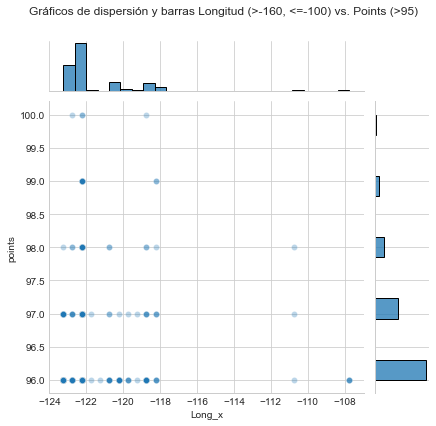

In [39]:
#Zona EU
df = eda[(eda.points>95) & (eda.Long_x>-160) & (eda.Long_x<=-100)]
p = sns.jointplot(x=df.Long_x,y=df.points, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Longitud (>-160, <=-100) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** Los mejores vinos se dan en las Longitudes alrededor de los -123.5° y -118°, que comprende la región de California. Aunque hay algunos vinos en la zona de -111° a -107°, es interesante analizar zonas con buenas latitudes para zonas de siembra y producción, sobre todo en lugares con acceso a buenas fuentes hídricas u oceanos.

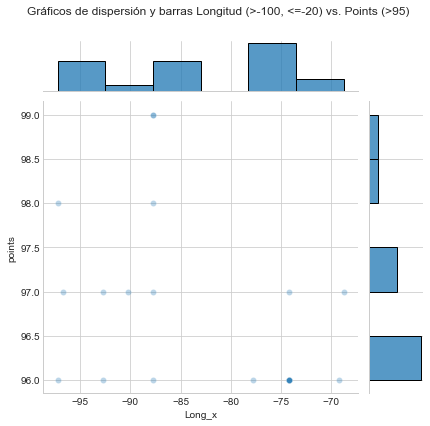

In [40]:
#Zona OUL
df = eda[(eda.points>95) & (eda.Long_x>-100) & (eda.Long_x<=-20)]
p = sns.jointplot(x=df.Long_x,y=df.points, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Longitud (>-100, <=-20) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** Los mejores vinos se dan en múltiples longitudes, con concentración entre los -97° y -87°

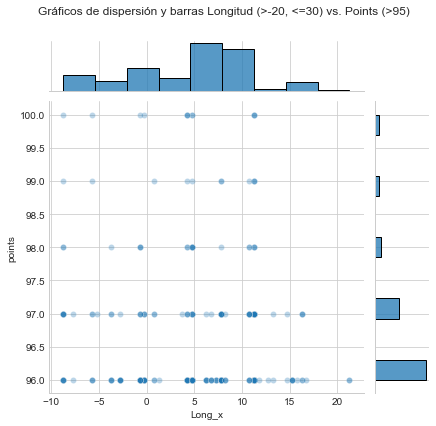

In [41]:
#Zona EEA
df = eda[(eda.points>95) & (eda.Long_x>-20) & (eda.Long_x<=30)]
p = sns.jointplot(x=df.Long_x,y=df.points, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Longitud (>-20, <=30) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** Los mejores vinos se encuentran distribuidos, con una mayor concentración entre los -9° y 12°, la cual es la zona comprendida para España, Francia e Italia.

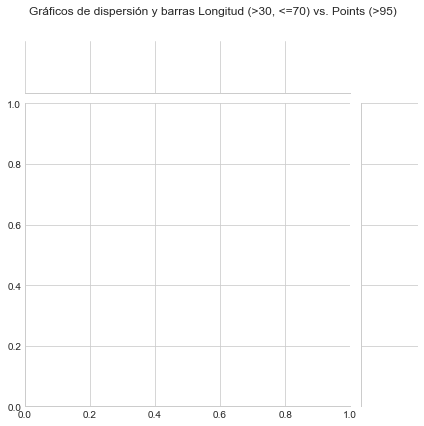

In [42]:
#Zona OEEA
df = eda[(eda.points>95) & (eda.Long_x>30) & (eda.Long_x<=70)]
p = sns.jointplot(x=df.Long_x,y=df.points, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Longitud (>30, <=70) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** No se encontraron datos de esta zona.

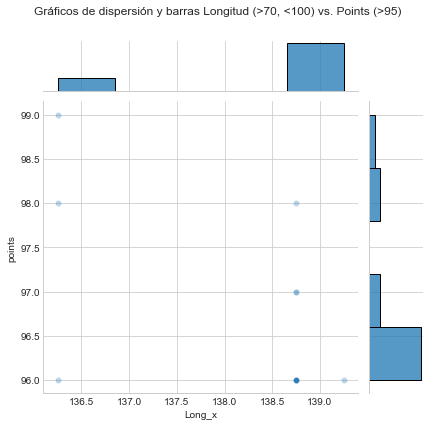

In [43]:
#Zona AO
df = eda[(eda.points>95) & (eda.Long_x>70) & (eda.Long_x<180)]
p = sns.jointplot(x=df.Long_x,y=df.points, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Longitud (>70, <100) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** Los datos encontrados hacen referencia a Australia, con la mayoría de vinos entre los 138° y 140°.